In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.python as tf
import sklearn
import scipy

%matplotlib inline

Data Loading

In [455]:
agrolimate_csv = './POWER_Regional_monthly_1981_2020_000d9857S_002d4905N_100d0750E_103d7500E_LST.csv'
prod_qty_csv = './FAOSTAT_data_prodQTY.csv'
yield_csv = './FAOSTAT_data_panen.csv'
harvested_csv = './FAOSTAT_data_area_harvested.csv'

AGROCLIMATE DATA

NASA/POWER CERES/MERRA2 Native Resolution Monthly and Annual 
Dates (month/day/year): 01/01/1981 through 12/31/2020 
Location: Regional 
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = na meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999 
Parameter(s): 
1. TS                   : MERRA-2 Earth Skin Temperature (C) 
2. T2M                  : MERRA-2 Temperature at 2 Meters (C) 
3. QV2M                 : MERRA-2 Specific Humidity at 2 Meters (g/kg) 
4. RH2M                 : MERRA-2 Relative Humidity at 2 Meters (%) 
5. T2MDEW               : MERRA-2 Dew/Frost Point at 2 Meters (C) 
6. T2MWET               : MERRA-2 Wet Bulb Temperature at 2 Meters (C) 
7. GWETTOP              : MERRA-2 Surface Soil Wetness (1) 
8. T2M_MAX              : MERRA-2 Temperature at 2 Meters Maximum (C) 
9. T2M_MIN              : MERRA-2 Temperature at 2 Meters Minimum (C) 
10. GWETPROF            : MERRA-2 Profile Soil Moisture (1) 
11. GWETROOT            : MERRA-2 Root Zone Soil Wetness (1) 
12. T2M_RANGE           : MERRA-2 Temperature at 2 Meters Range (C) 
13. PRECTOTCORR         : MERRA-2 Precipitation Corrected (mm/day) 
14. PRECTOTCORR_SUM     : MERRA-2 Precipitation Corrected Sum (mm) 
15. ALLSKY_SFC_LW_DWN   : CERES SYN1deg All Sky Surface Longwave Downward Irradiance (W/m^2)

FAOSTAT DATA

1.	Domain Code		        : Kode domain data.
2.	Domain			        : Nama domain data.
3.	Area Code (M49)	        :  Kode area.
4.	Area			        : Nama Negara.
5.	Element Code		    : Kode element.
6.	Element		            : Komponen, Area Harvested.
7.	Item Code (CPC)	        : Kode produk.
8.	Item			        : Nama jenis produk.
9.	Year Code		        : Kode tahun.
10.	Year			        : Tahun.
11.	Unit			        : Satuan unit, Ha (hektar).
12.	Value			        : Nilai data.
13.	Flag			        : Binary (E/A)
14.	Flag Description		: Deskripsi Flag. E = Estimated Value, A = Official Figure


In [456]:
# Reading dataset from source

from pandas import read_csv

agrolimate_data = read_csv(agrolimate_csv)
prod_qty_data = read_csv(prod_qty_csv)
yield_data = read_csv(yield_csv)
harvested_data = read_csv(harvested_csv)

In [457]:
# Creating Dataframe

agrolimate_df = pd.DataFrame(agrolimate_data)
prod_qty_df = pd.DataFrame(prod_qty_data)
yield_df = pd.DataFrame(yield_data)
harvested_df = pd.DataFrame(harvested_data)

Droping unnececary column

In [458]:
prod_qty_df = prod_qty_df.filter(['Production Quantity'])
yield_df = yield_df.filter(['Crop Yield'])
harvested_df = harvested_df.filter(['Harvested Area'])
agrolimate_df = agrolimate_df.filter(['PARAMETER', 'YEAR', 'LAT', 'LON', 'ANN'])

In [459]:
# separating agroclimate data based on parameter
# this code is stupid better loop this instead doing one by one - m1
# idc you do that instead - m2

TS_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'TS'].reset_index(drop=True)
T2M_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'T2M'].reset_index(drop=True)
QV2M_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'QV2M'].reset_index(drop=True)
RH2M_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'RH2M'].reset_index(drop=True)
T2MDEW_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'T2MDEW'].reset_index(drop=True)
T2MWET_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'T2MWET'].reset_index(drop=True)
GWETTOP_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'GWETTOP'].reset_index(drop=True)
T2M_MAX_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'T2M_MAX'].reset_index(drop=True)
T2M_MIN_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'T2M_MIN'].reset_index(drop=True)
GWETPROF_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'GWETPROF'].reset_index(drop=True)
GWETROOT_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'GWETROOT'].reset_index(drop=True)
T2M_RANGE_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'T2M_RANGE'].reset_index(drop=True)
PRECTOTCORR_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'PRECTOTCORR'].reset_index(drop=True)
PRECTOTCORR_SUM_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'PRECTOTCORR_SUM'].reset_index(drop=True)
ALLSKY_SFC_LW_DWN_df = agrolimate_df.loc[agrolimate_df['PARAMETER'] == 'ALLSKY_SFC_LW_DWN'].reset_index(drop=True)

In [460]:
# create mean data for all longitude and latitude based on year
# this code is stupid better loop this instead doing one by one - m1
# idc you do that instead - m2

new_TS_df = pd.DataFrame(TS_df.groupby('YEAR').mean()['ANN'])
new_TS_df = new_TS_df.rename(columns={'ANN': 'TS'})
new_TS_df = new_TS_df.reset_index(drop=True)

new_T2M_df = pd.DataFrame(T2M_df.groupby('YEAR').mean()['ANN'])
new_T2M_df = new_T2M_df.rename(columns={'ANN': 'T2M'})
new_T2M_df = new_T2M_df.reset_index(drop=True)

new_QV2M_df = pd.DataFrame(QV2M_df.groupby('YEAR').mean()['ANN'])
new_QV2M_df = new_QV2M_df.rename(columns={'ANN': 'QV2M'})
new_QV2M_df = new_QV2M_df.reset_index(drop=True)

new_RH2M_df = pd.DataFrame(RH2M_df.groupby('YEAR').mean()['ANN'])
new_RH2M_df = new_RH2M_df.rename(columns={'ANN': 'RH2M'})
new_RH2M_df = new_RH2M_df.reset_index(drop=True)

new_T2MDEW_df = pd.DataFrame(T2MDEW_df.groupby('YEAR').mean()['ANN'])
new_T2MDEW_df = new_T2MDEW_df.rename(columns={'ANN': 'T2MDEW'})
new_T2MDEW_df = new_T2MDEW_df.reset_index(drop=True)

new_T2MWET_df = pd.DataFrame(T2MWET_df.groupby('YEAR').mean()['ANN'])
new_T2MWET_df = new_T2MWET_df.rename(columns={'ANN': 'T2MWET'})
new_T2MWET_df = new_T2MWET_df.reset_index(drop=True)

new_GWETTOP_df = pd.DataFrame(GWETTOP_df.groupby('YEAR').mean()['ANN'])
new_GWETTOP_df = new_GWETTOP_df.rename(columns={'ANN': 'GWETTOP'})
new_GWETTOP_df = new_GWETTOP_df.reset_index(drop=True)

new_T2M_MAX_df = pd.DataFrame(T2M_MAX_df.groupby('YEAR').mean()['ANN'])
new_T2M_MAX_df = new_T2M_MAX_df.rename(columns={'ANN': 'T2M_MAX'})
new_T2M_MAX_df = new_T2M_MAX_df.reset_index(drop=True)

new_T2M_MIN_df = pd.DataFrame(T2M_MIN_df.groupby('YEAR').mean()['ANN'])
new_T2M_MIN_df = new_T2M_MIN_df.rename(columns={'ANN': 'T2M_MIN'})
new_T2M_MIN_df = new_T2M_MIN_df.reset_index(drop=True)

new_GWETPROF_df = pd.DataFrame(GWETPROF_df.groupby('YEAR').mean()['ANN'])
new_GWETPROF_df = new_GWETPROF_df.rename(columns={'ANN': 'GWETPROF'})
new_GWETPROF_df = new_GWETPROF_df.reset_index(drop=True)

new_GWETROOT_df = pd.DataFrame(GWETROOT_df.groupby('YEAR').mean()['ANN'])
new_GWETROOT_df = new_GWETROOT_df.rename(columns={'ANN': 'GWETROOT'})
new_GWETROOT_df = new_GWETROOT_df.reset_index(drop=True)

new_T2M_RANGE_df = pd.DataFrame(T2M_RANGE_df.groupby('YEAR').mean()['ANN'])
new_T2M_RANGE_df = new_T2M_RANGE_df.rename(columns={'ANN': 'T2M_RANGE'})
new_T2M_RANGE_df = new_T2M_RANGE_df.reset_index(drop=True)

new_PRECTOTCORR_df = pd.DataFrame(PRECTOTCORR_df.groupby('YEAR').mean()['ANN'])
new_PRECTOTCORR_df = new_PRECTOTCORR_df.rename(columns={'ANN': 'PRECTOTCORR'})
new_PRECTOTCORR_df = new_PRECTOTCORR_df.reset_index(drop=True)

new_PRECTOTCORR_SUM_df = pd.DataFrame(PRECTOTCORR_SUM_df.groupby('YEAR').mean()['ANN'])
new_PRECTOTCORR_SUM_df = new_PRECTOTCORR_SUM_df.rename(columns={'ANN': 'PRECTOTCORR_SUM'})
new_PRECTOTCORR_SUM_df = new_PRECTOTCORR_SUM_df.reset_index(drop=True)

new_ALLSKY_SFC_LW_DWN_df = pd.DataFrame(ALLSKY_SFC_LW_DWN_df.groupby('YEAR').mean()['ANN'])
new_ALLSKY_SFC_LW_DWN_df = new_ALLSKY_SFC_LW_DWN_df.rename(columns={'ANN': 'ALLSKY_SFC_LW_DWN'})
new_ALLSKY_SFC_LW_DWN_df = new_ALLSKY_SFC_LW_DWN_df.reset_index(drop=True)

C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2686441713.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_TS_df = pd.DataFrame(TS_df.groupby('YEAR').mean()['ANN'])
C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2686441713.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_T2M_df = pd.DataFrame(T2M_df.groupby('YEAR').mean()['ANN'])
C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2686441713.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only colum

Merge Dataframes into one Dataframe

In [461]:
# merginr newly created agroclimate data frame

agroclimate_merge = [
    new_TS_df,
    new_T2M_df,
    new_QV2M_df,
    new_RH2M_df,
    new_T2MDEW_df,
    new_T2MWET_df,
    new_GWETTOP_df,
    new_T2M_MAX_df,
    new_T2M_MIN_df,
    new_GWETPROF_df,
    new_GWETROOT_df,
    new_T2M_RANGE_df,
    new_PRECTOTCORR_df,
    new_PRECTOTCORR_SUM_df,
    new_ALLSKY_SFC_LW_DWN_df
]

new_agroclimate_df = pd.concat(agroclimate_merge, axis=1)

In [462]:
merge = [new_agroclimate_df, prod_qty_df, harvested_df, yield_df]

data = pd.concat(merge, axis=1)

In [463]:
data.sample(20)

TS        T2M       QV2M       RH2M     T2MDEW     T2MWET  \
2   26.578393  26.252321  18.164821  85.166607  23.427857  24.839643   
22  26.468393  26.180536  18.651071  87.532857  23.859286  25.020000   
15  26.228214  25.951964  18.398750  87.447857  23.616071  24.783571   
32  26.462143  26.289643  18.578929  86.635357  23.781964  25.036429   
4   26.038393  25.735893  17.731250  85.583750  23.017679  24.378036   
1   26.297321  25.960000  17.834643  85.045714  23.118571  24.540179   
34  26.658929  26.458036  18.665179  86.305179  23.874464  25.167321   
16  26.420179  26.170893  18.431964  86.663929  23.667500  24.919286   
3   25.818393  25.514821  17.748393  86.702500  23.033393  24.274821   
20  26.310000  26.009643  18.530714  87.732679  23.736429  24.873214   
24  26.491429  26.241786  18.660714  87.246429  23.860714  25.052321   
9   26.548750  26.243214  18.238393  85.483571  23.493393  24.868214   
27  26.209286  25.986964  18.498214  87.755179  23.714464  24.850179   
30  26.241786  26.044821  18.436607  87.141071  23.649286  24.847143   
35  26.874821  26.664286  18.921071  86.345357  24.089107  25.376429   
36  26.571964  26.345714  18.740357  87.079821  23.931964  25.139107   
5   26.003929  25.728393  17.918393  86.477500  23.198214  24.464107   
38  26.967143  26.764107  18.855893  85.678750  24.037321  25.400536   
29  26.622857  26.383571  18.711786  86.715357  23.892679  25.138214   
17  27.016964  26.711429  19.173929  87.170893  24.301429  25.506786   

     GWETTOP    T2M_MAX    T2M_MIN  GWETPROF  GWETROOT  T2M_RANGE  \
2   0.810000  32.058750  21.546964  0.846429  0.808571  10.510536   
22  0.892679  31.065179  22.162679  0.929643  0.915536   8.902857   
15  0.871786  31.112143  21.339643  0.912321  0.890179   9.772857   
32  0.894286  31.430179  21.938393  0.934643  0.918750   9.492857   
4   0.827679  30.970714  21.105714  0.863214  0.831071   9.863393   
1   0.767500  31.335893  20.855714  0.800000  0.760179  10.480714   
34  0.843036  31.413929  21.655000  0.883214  0.855893   9.758750   
16  0.793036  31.069464  21.529821  0.829464  0.793036   9.538929   
3   0.885536  30.475536  21.325000  0.927857  0.910536   9.151071   
20  0.900179  30.845000  21.642857  0.940714  0.928214   9.202500   
24  0.866607  31.470179  21.696250  0.903393  0.883214   9.774107   
9   0.743571  31.757500  21.781071  0.769821  0.728571   9.976607   
27  0.907500  31.060714  22.078750  0.947857  0.939821   8.980893   
30  0.886429  31.010179  21.781429  0.928214  0.909107   9.228929   
35  0.871786  31.911250  22.310714  0.911429  0.891964   9.600000   
36  0.911964  31.458929  21.516964  0.951071  0.945714   9.940714   
5   0.869286  30.696250  21.236607  0.906786  0.886071   9.459821   
38  0.817143  31.903393  21.805000  0.855357  0.821786  10.097321   
29  0.910536  31.609464  21.793393  0.946071  0.942857   9.816071   
17  0.848571  32.128571  22.538393  0.883929  0.858571   9.590357   

    PRECTOTCORR  PRECTOTCORR_SUM  ALLSKY_SFC_LW_DWN  Production Quantity  \
2      6.065536      2130.430893        -999.000000              4600000   
22     8.559821      3048.216250         418.442500             52600000   
15     6.700714      2369.798036         420.872143             24490000   
32     7.648393      2730.566429         416.012857            180068301   
4      6.200536      2188.956607         267.494643              6550000   
1      5.521607      1935.285714        -999.000000              4300000   
34     6.151071      2171.046250         419.313929            183364519   
16     4.719643      1636.752857         422.511429             26930000   
3      7.489286      2653.480536         271.838214              6280000   
20     7.198929      2533.227679         417.561786             40950000   
24     7.462679      2644.281250         419.046786             74000000   
9      4.803393      1662.968929         421.720714             11151795   
27     7.742321      2774.657679         415.910357         

Exploratory Data Analysis & Preprocessing

In [464]:
# checking mising value

data.isnull().sum()

TS                     0
T2M                    0
QV2M                   0
RH2M                   0
T2MDEW                 0
T2MWET                 0
GWETTOP                0
T2M_MAX                0
T2M_MIN                0
GWETPROF               0
GWETROOT               0
T2M_RANGE              0
PRECTOTCORR            0
PRECTOTCORR_SUM        0
ALLSKY_SFC_LW_DWN      0
Production Quantity    0
Harvested Area         0
Crop Yield             0
dtype: int64

In [465]:
# Checking duplicated data

print(f'Duplicated data in data frame: {data.duplicated().sum()}')

Duplicated data in data frame: 0


In [466]:
# checking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TS                   40 non-null     float64
 1   T2M                  40 non-null     float64
 2   QV2M                 40 non-null     float64
 3   RH2M                 40 non-null     float64
 4   T2MDEW               40 non-null     float64
 5   T2MWET               40 non-null     float64
 6   GWETTOP              40 non-null     float64
 7   T2M_MAX              40 non-null     float64
 8   T2M_MIN              40 non-null     float64
 9   GWETPROF             40 non-null     float64
 10  GWETROOT             40 non-null     float64
 11  T2M_RANGE            40 non-null     float64
 12  PRECTOTCORR          40 non-null     float64
 13  PRECTOTCORR_SUM      40 non-null     float64
 14  ALLSKY_SFC_LW_DWN    40 non-null     float64
 15  Production Quantity  40 non-null     int64

In [467]:
data.describe()

TS        T2M       QV2M       RH2M     T2MDEW     T2MWET  \
count  40.000000  40.000000  40.000000  40.000000  40.000000  40.000000   
mean   26.420250  26.160643  18.466513  86.795384  23.685897  24.923406   
std     0.241280   0.258844   0.315319   0.766211   0.281407   0.257911   
min    25.818393  25.514821  17.731250  85.045714  23.017679  24.274821   
25%    26.294375  26.011920  18.361696  86.440848  23.596563  24.825536   
50%    26.400536  26.139018  18.529018  86.787054  23.737946  24.925804   
75%    26.555045  26.275714  18.653482  87.426295  23.859643  25.040402   
max    27.016964  26.764107  19.173929  88.182679  24.301429  25.506786   

         GWETTOP    T2M_MAX    T2M_MIN   GWETPROF   GWETROOT  T2M_RANGE  \
count  40.000000  40.000000  40.000000  40.000000  40.000000  40.000000   
mean    0.858982  31.260009  21.661129   0.897170   0.874076   9.598754   
std     0.040509   0.382600   0.370473   0.042967   0.052303   0.413784   
min     0.743571  30.475536  20.855714   0.769821   0.728571   8.902857   
25%     0.837768  31.000312  21.429777   0.875580   0.842500   9.250000   
50%     0.869375  31.211250  21.659821   0.909196   0.885804   9.595179   
75%     0.886429  31.437366  21.859152   0.927946   0.910268   9.812455   
max     0.911964  32.128571  22.538393   0.951071   0.945714  10.510536   

       PRECTOTCORR  PRECTOTCORR_SUM  ALLSKY_SFC_LW_DWN  Production Quantity  \
count    40.000000        40.000000          40.000000         4.000000e+01   
mean      6.944219      2458.534246         298.059661         7.791797e+07   
std       0.973859       361.065071         376.787881         8.229456e+07   
min       4.719643      1636.752857        -999.000000         3.800000e+06   
25%       6.188170      2184.479018         416.051696         1.190286e+07   
50%       7.230536      2555.870446         418.744643         3.866500e+07   
75%       7.487679      2665.387946         420.906161         1.481071e+08   
max       8.704464      3114.615000         424.791071         2.565286e+08   

       Harvested Area     Crop Yield  
count    4.000000e+01      40.000000  
mean     4.483448e+06  178114.475000  
std      4.801609e+06   13845.334558  
min      2.300000e+05  151349.000000  
25%      7.474420e+05  170960.500000  
50%      2.107000e+06  172906.500000  
75%      8.537252e+06  185866.000000  
max      1.499601e+07  211947.000000

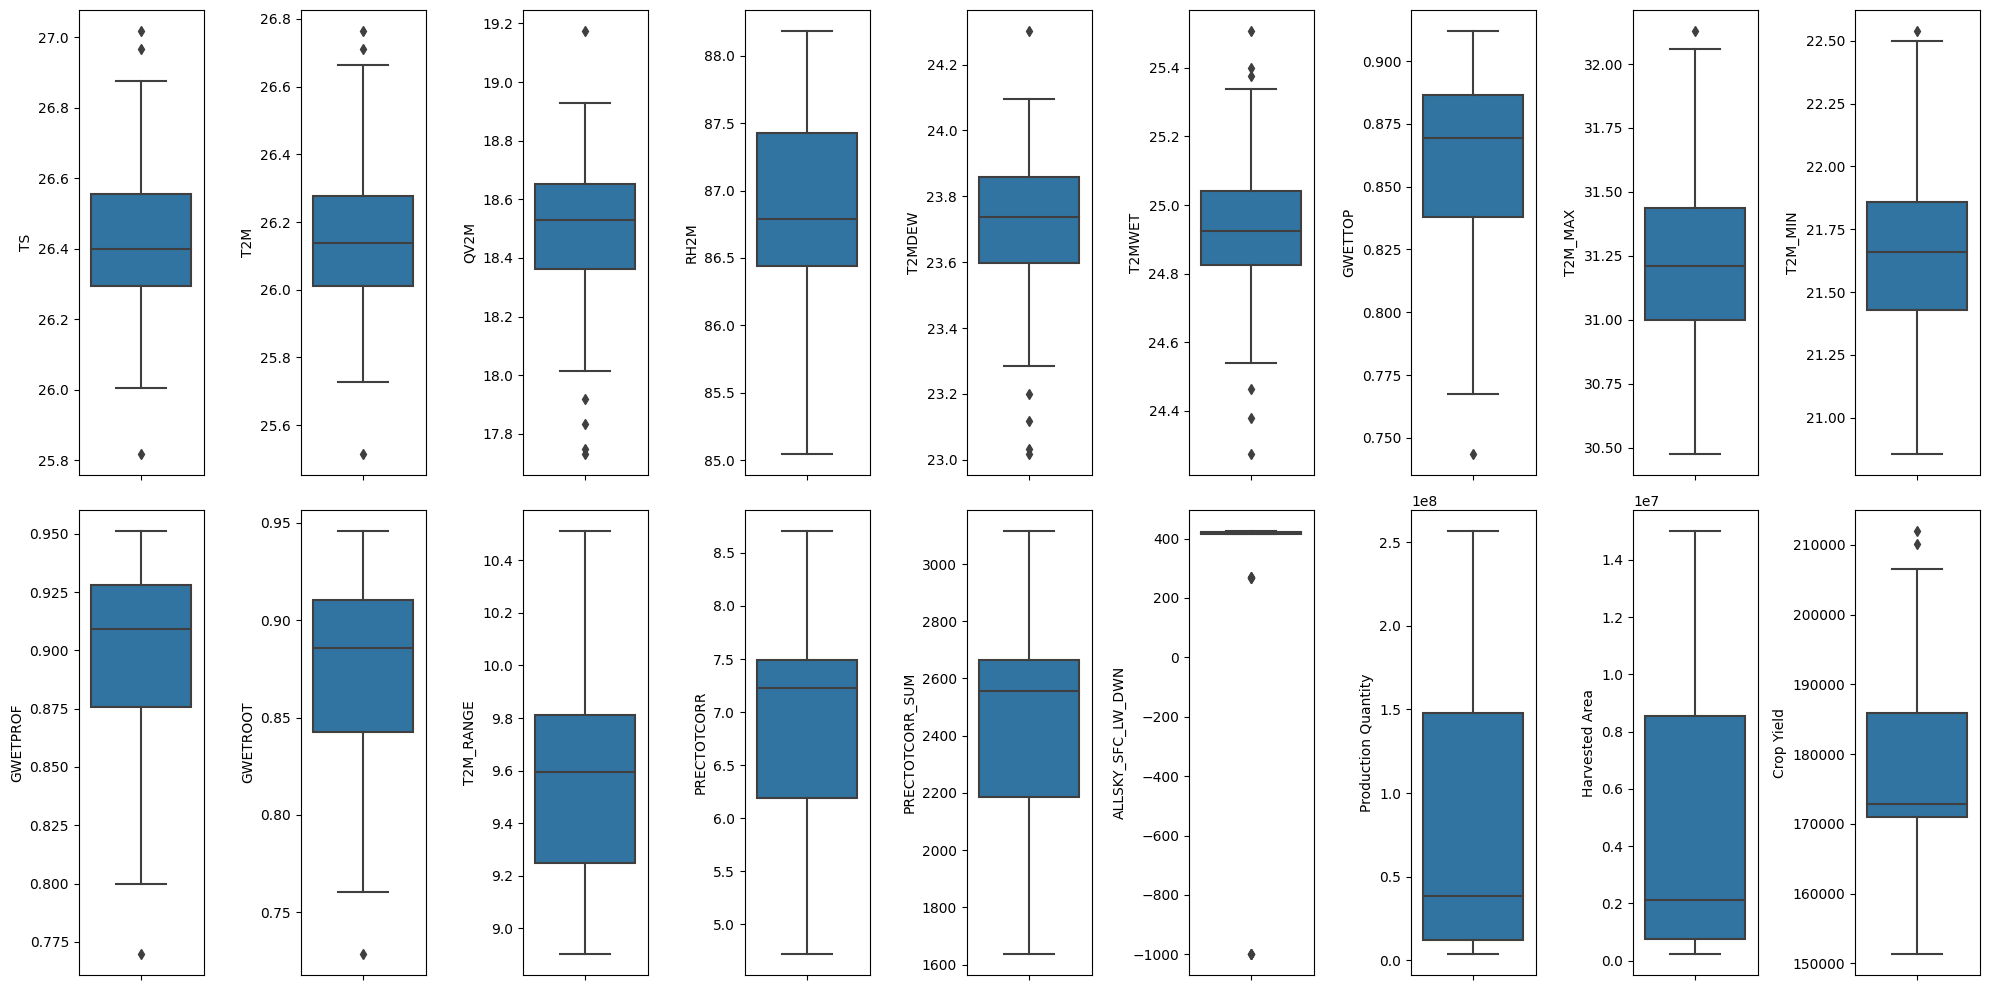

In [468]:
# checking the outliers

fig, axs = plt.subplots(ncols=9, nrows=2, figsize=(20, 10))
index=0
axs = axs.flatten()

for k, v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index+=1

plt.tight_layout()

In [469]:
# checking outlier percentage

for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1

    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]

    print('Column {} Outliers {:.2f}%'.format(k, perc))

Column TS Outliers 7.50%
Column T2M Outliers 7.50%
Column QV2M Outliers 12.50%
Column RH2M Outliers 0.00%
Column T2MDEW Outliers 12.50%
Column T2MWET Outliers 15.00%
Column GWETTOP Outliers 2.50%
Column T2M_MAX Outliers 2.50%
Column T2M_MIN Outliers 2.50%
Column GWETPROF Outliers 2.50%
Column GWETROOT Outliers 2.50%
Column T2M_RANGE Outliers 0.00%
Column PRECTOTCORR Outliers 0.00%
Column PRECTOTCORR_SUM Outliers 0.00%
Column ALLSKY_SFC_LW_DWN Outliers 17.50%
Column Production Quantity Outliers 0.00%
Column Harvested Area Outliers 0.00%
Column Crop Yield Outliers 5.00%


C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2461719023.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2461719023.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\malik\AppData\Local\Temp\

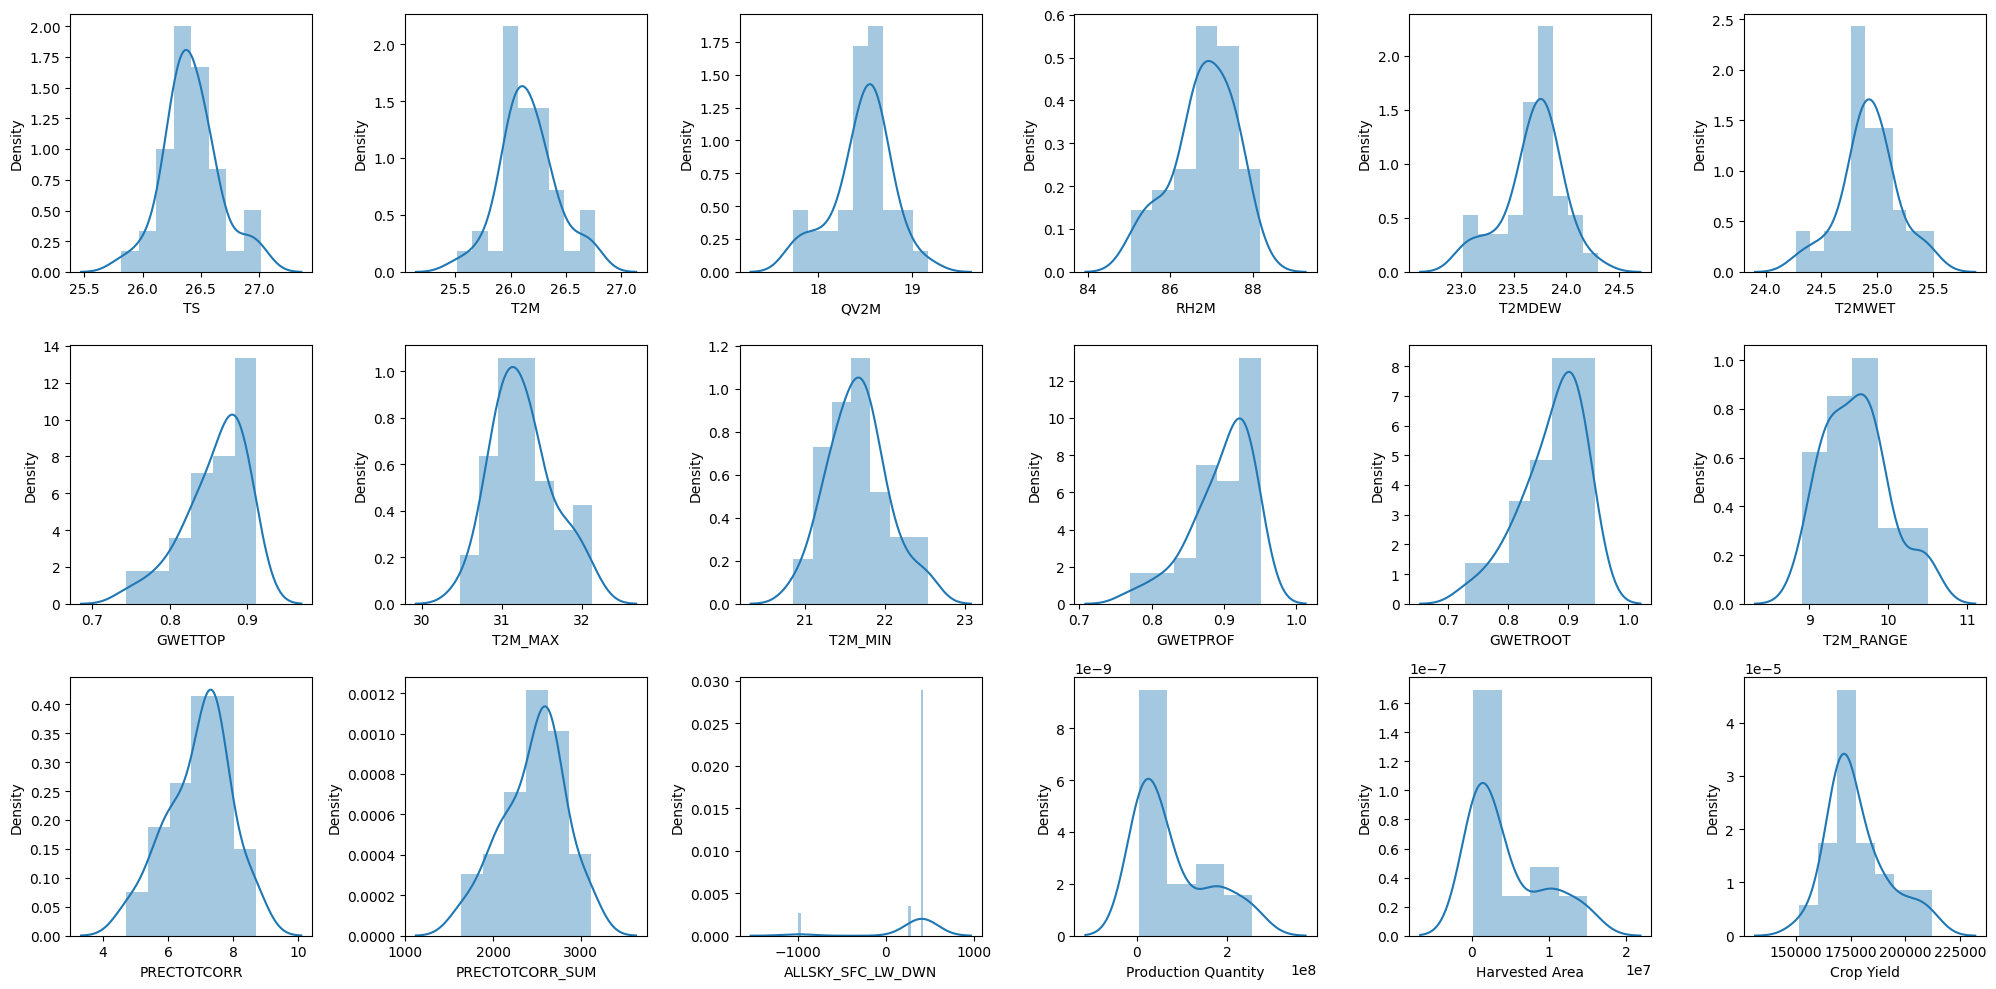

In [470]:
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(20,10))
index = 0
axs = axs.flatten()

for k, v in data.items():
  sns.distplot(v, ax=axs[index])
  index += 1

plt.tight_layout()

In [471]:
# checking skewness & kurtosis

index = 0

for k, v in data.items():
  print('Feature {} Skewness = {:.7f}'.format(k, data[k].skew()))
  print('Feature {} Kurtosis = {:.7f}'.format(k, data[k].kurt()))
  index += 1

Feature TS Skewness = 0.3358891
Feature TS Kurtosis = 1.0478877
Feature T2M Skewness = 0.2459337
Feature T2M Kurtosis = 0.7178776
Feature QV2M Skewness = -0.5870545
Feature QV2M Kurtosis = 0.5866817
Feature RH2M Skewness = -0.5607859
Feature RH2M Kurtosis = -0.2270219
Feature T2MDEW Skewness = -0.6424421
Feature T2MDEW Kurtosis = 0.6390332
Feature T2MWET Skewness = -0.1940609
Feature T2MWET Kurtosis = 0.7846102
Feature GWETTOP Skewness = -1.0082362
Feature GWETTOP Kurtosis = 0.6495494
Feature T2M_MAX Skewness = 0.4645560
Feature T2M_MAX Kurtosis = -0.1361596
Feature T2M_MIN Skewness = 0.3136481
Feature T2M_MIN Kurtosis = 0.2762727
Feature GWETPROF Skewness = -1.1291623
Feature GWETPROF Kurtosis = 0.9822247
Feature GWETROOT Skewness = -0.9150779
Feature GWETROOT Kurtosis = 0.4161550
Feature T2M_RANGE Skewness = 0.5254863
Feature T2M_RANGE Kurtosis = -0.1805305
Feature PRECTOTCORR Skewness = -0.4187163
Feature PRECTOTCORR Kurtosis = -0.1455802
Feature PRECTOTCORR_SUM Skewness = -0.417871


 mu = 26.42 and sigma = 0.24



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


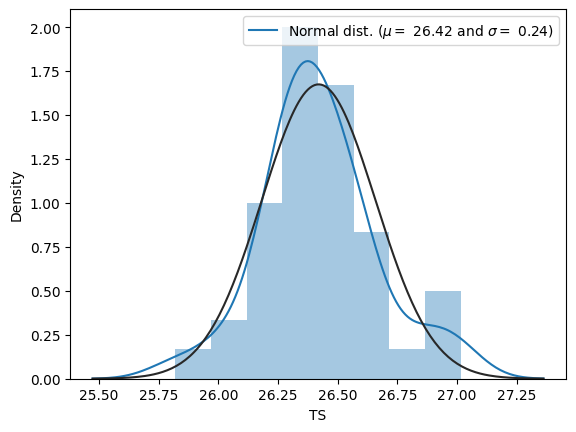

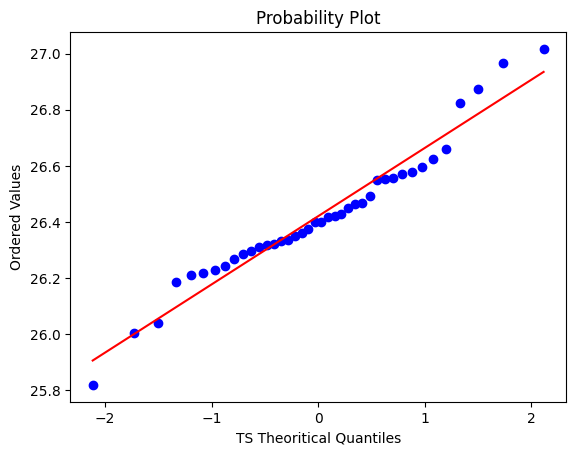


 mu = 26.16 and sigma = 0.26



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


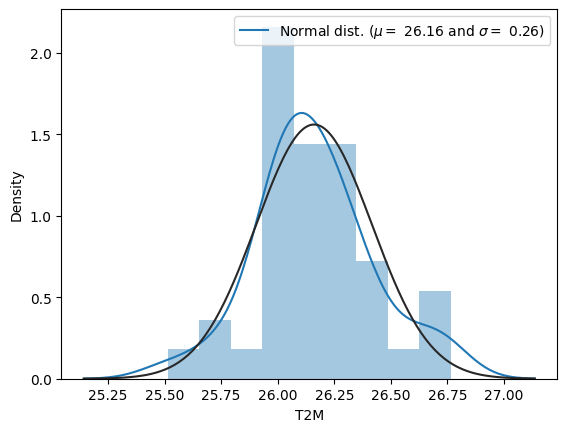

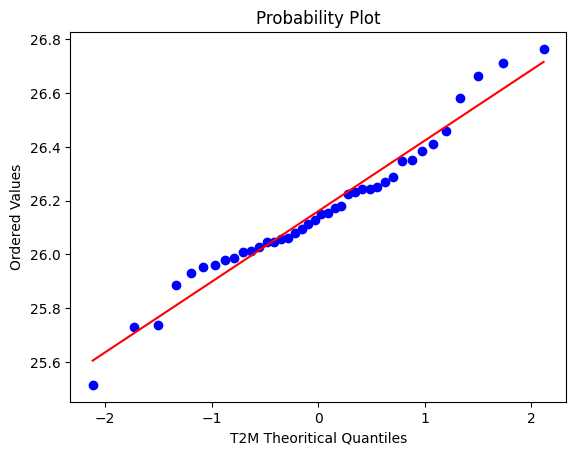


 mu = 18.47 and sigma = 0.31



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


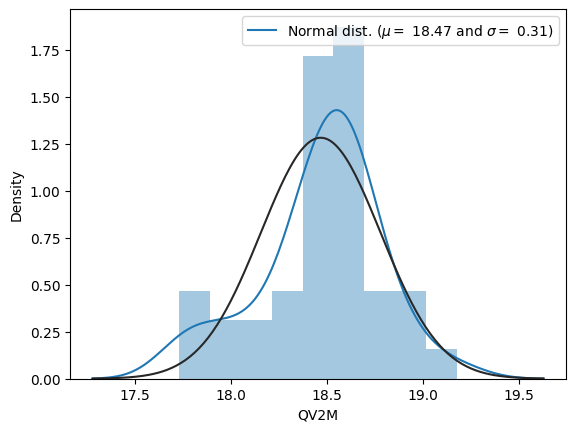

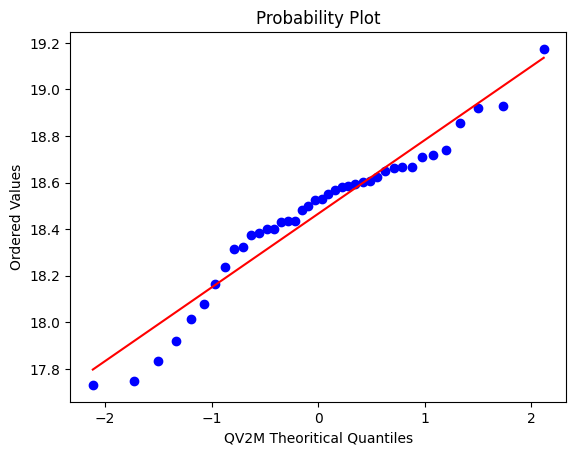


 mu = 86.80 and sigma = 0.76



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


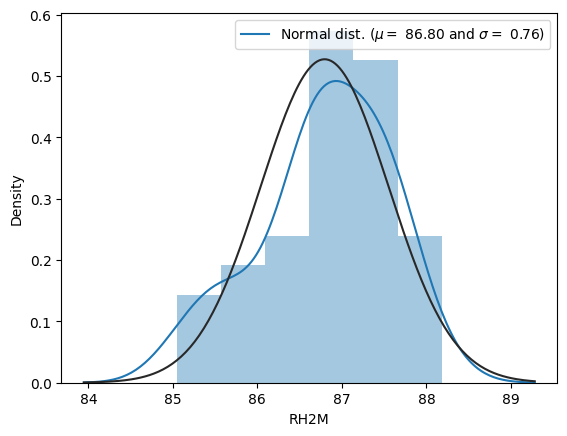

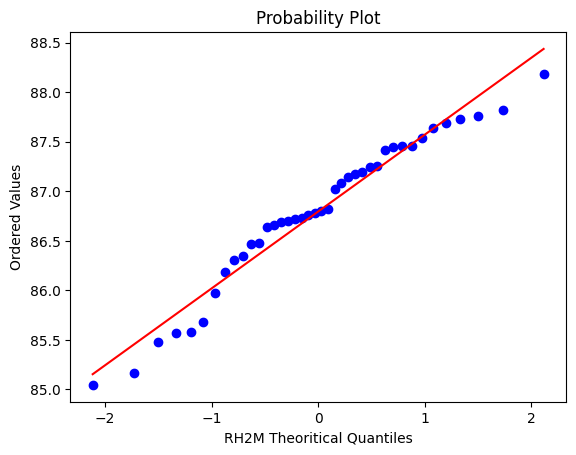


 mu = 23.69 and sigma = 0.28



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


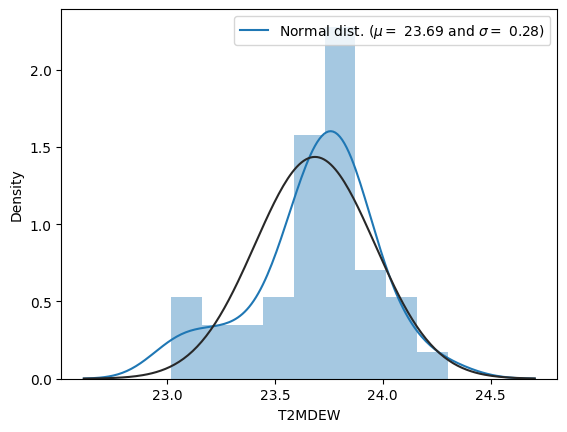

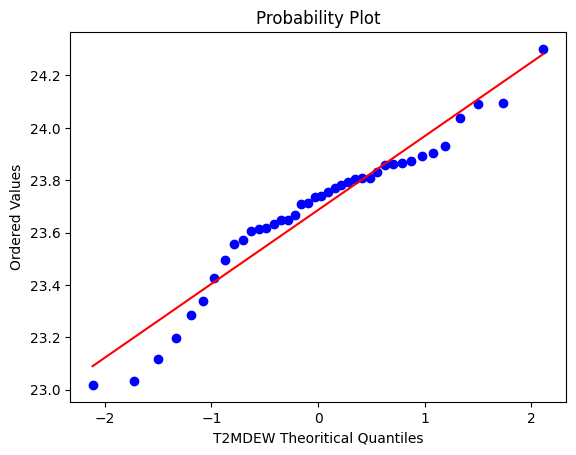


 mu = 24.92 and sigma = 0.25



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


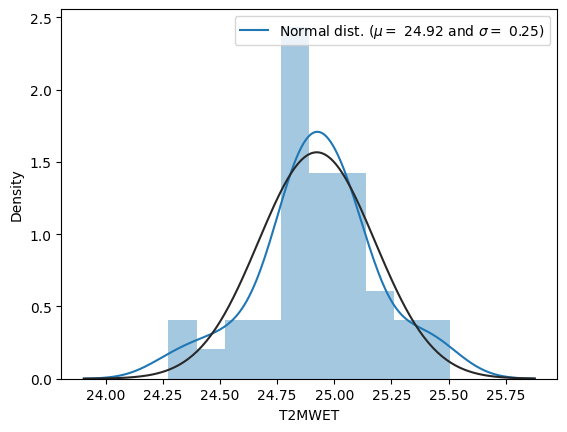

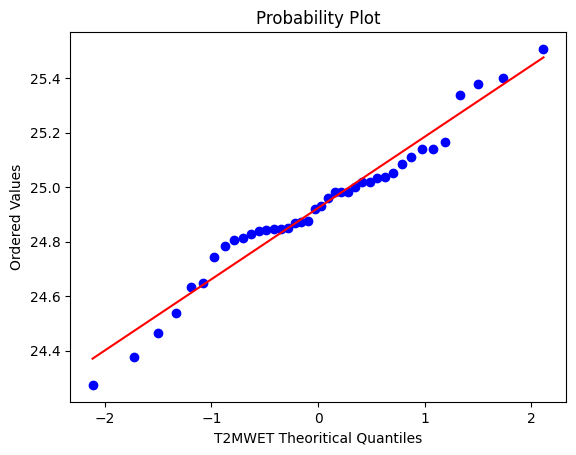


 mu = 0.86 and sigma = 0.04



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


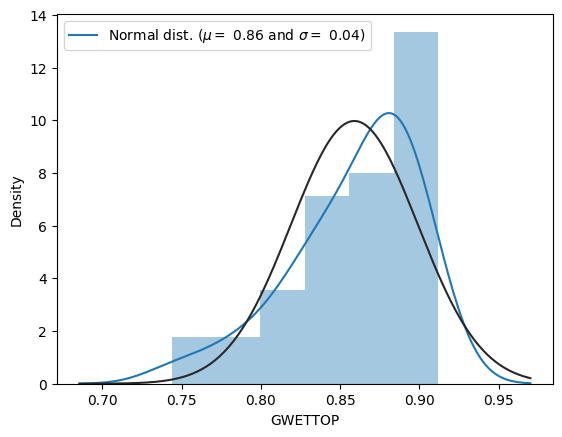

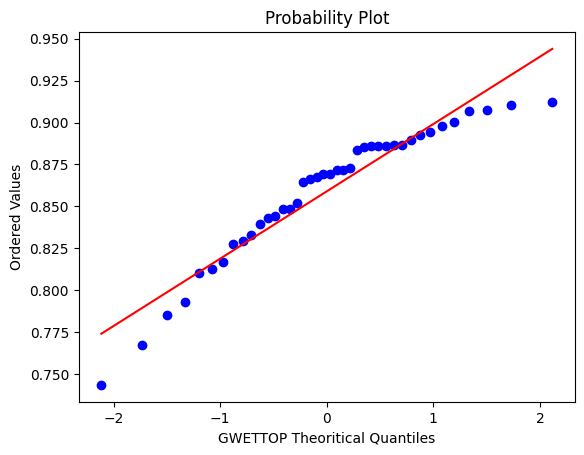


 mu = 31.26 and sigma = 0.38



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


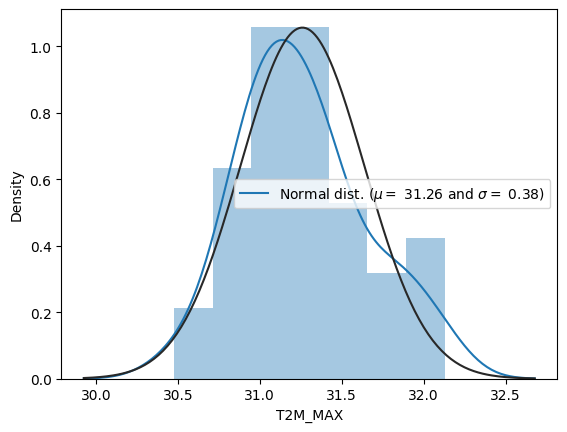

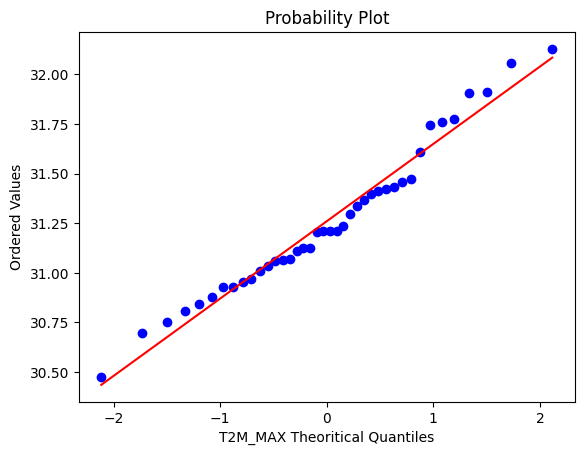


 mu = 21.66 and sigma = 0.37



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


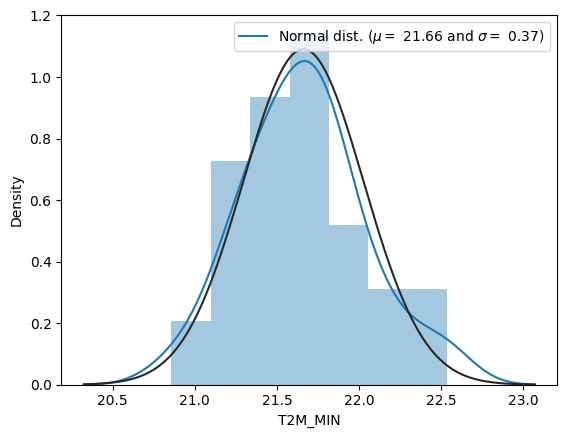

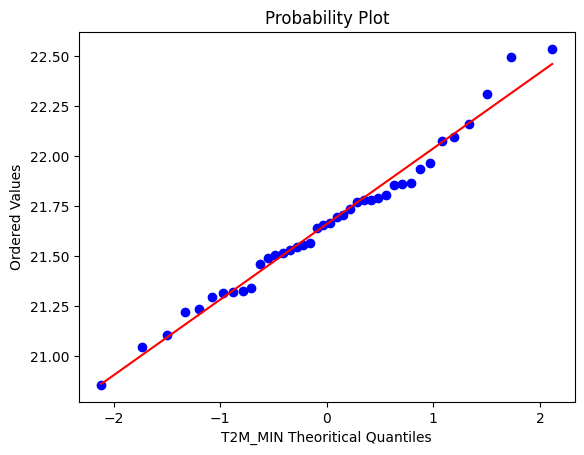


 mu = 0.90 and sigma = 0.04



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


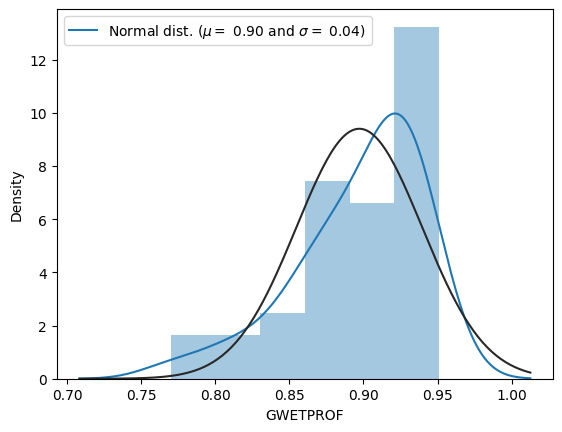

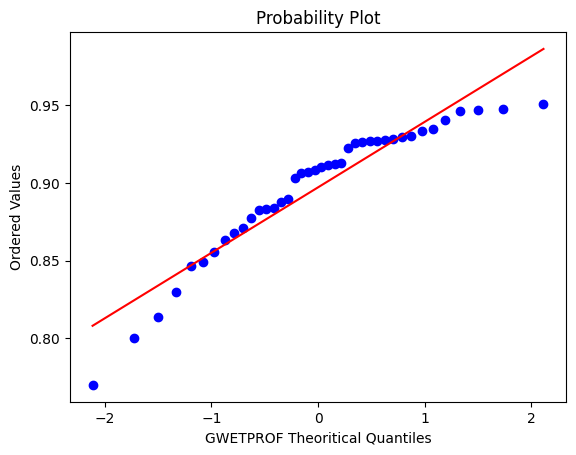


 mu = 0.87 and sigma = 0.05



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


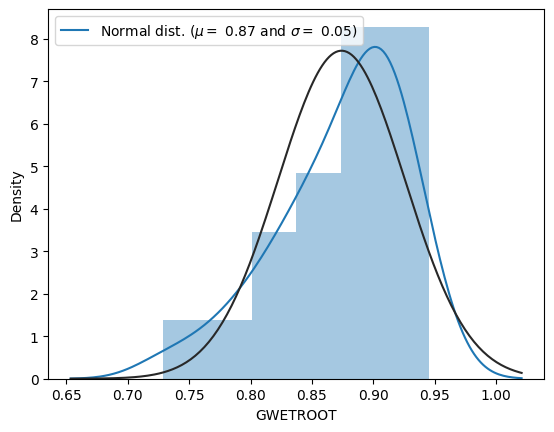

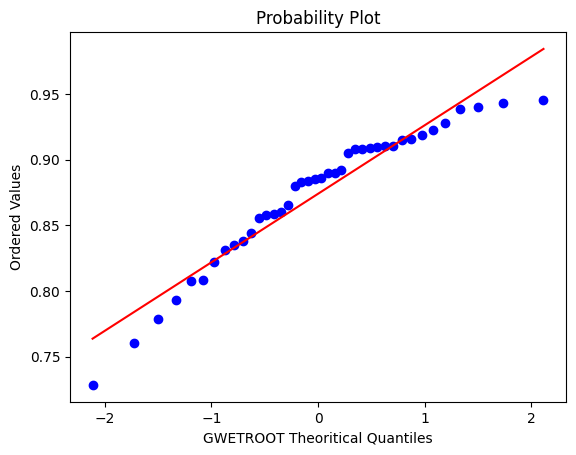


 mu = 9.60 and sigma = 0.41



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


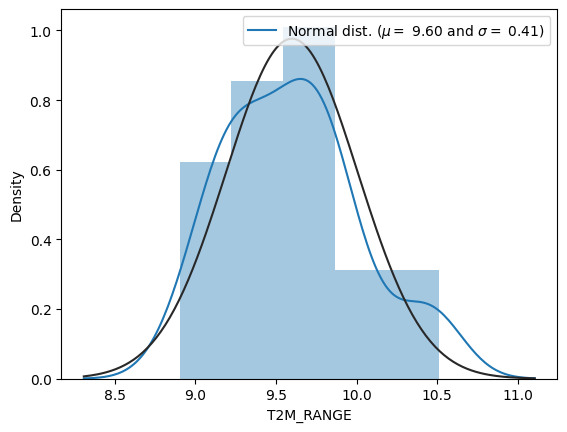

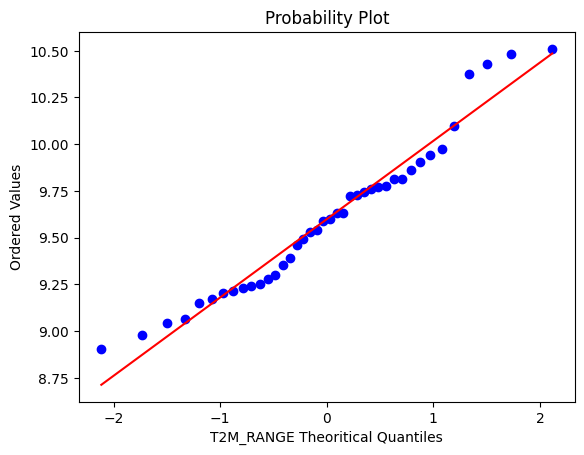


 mu = 6.94 and sigma = 0.96



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


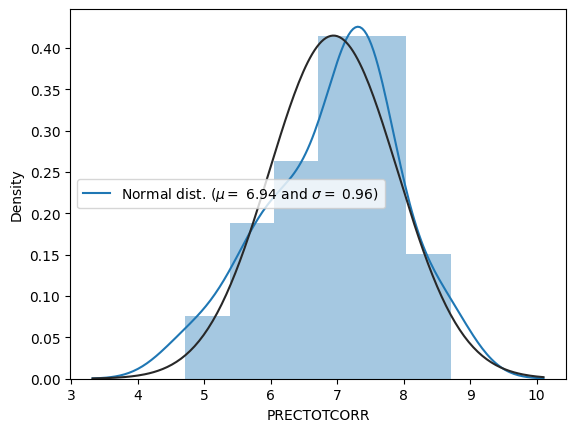

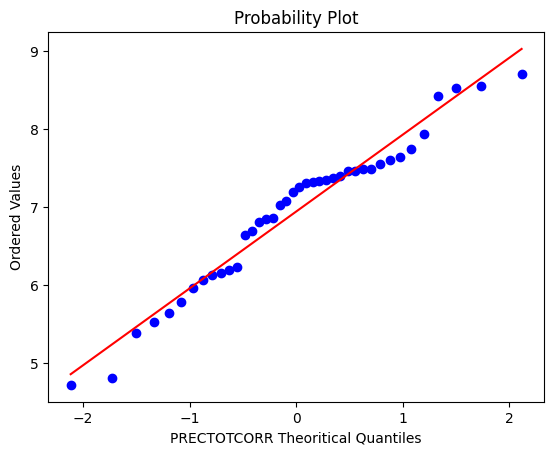


 mu = 2458.53 and sigma = 356.52



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


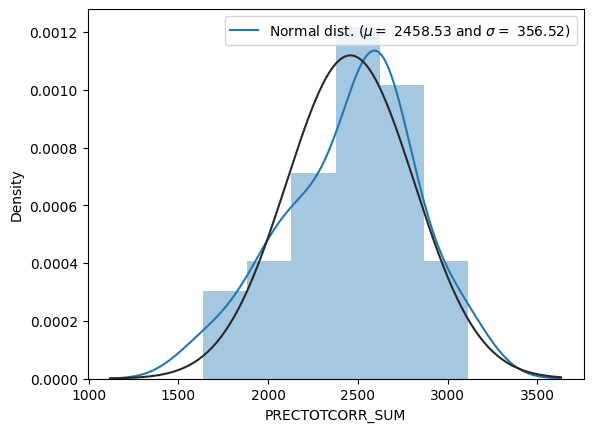

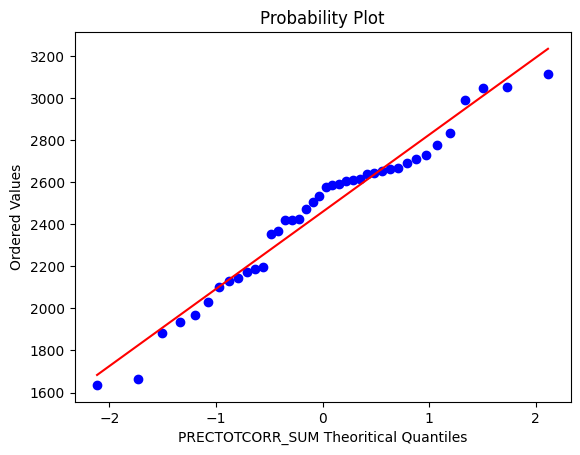


 mu = 298.06 and sigma = 372.05



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


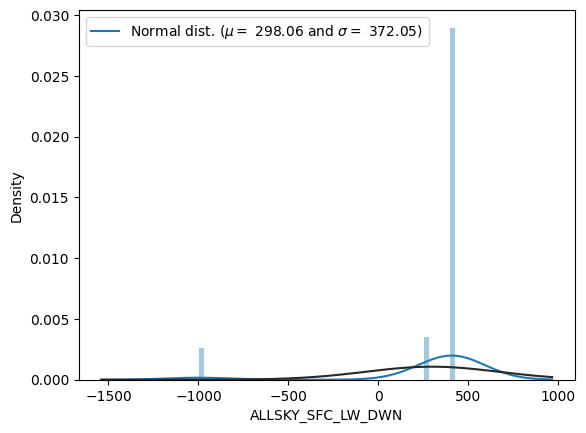

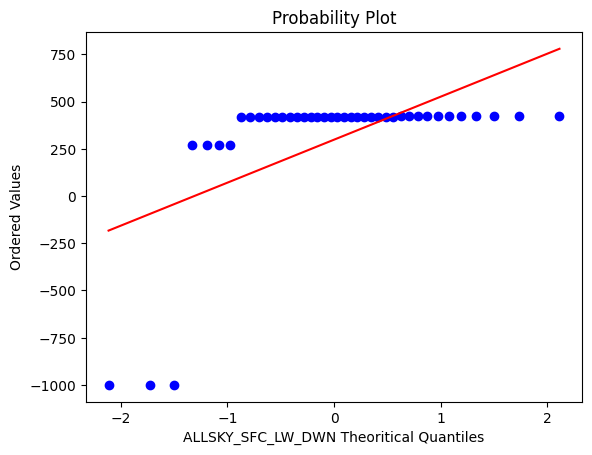


 mu = 77917969.08 and sigma = 81259368.00



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


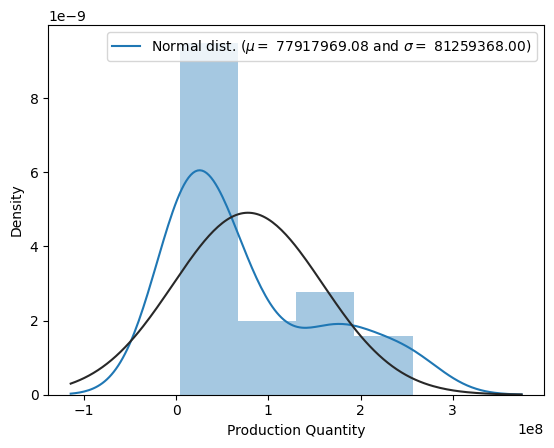

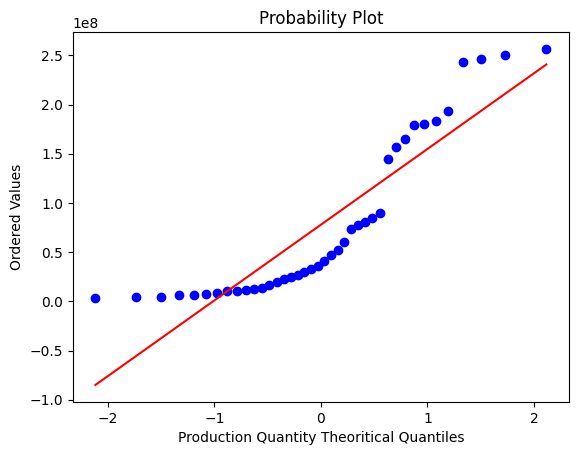


 mu = 4483447.80 and sigma = 4741209.42



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


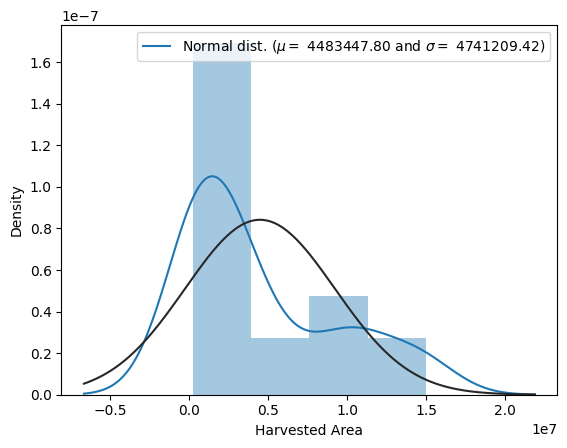

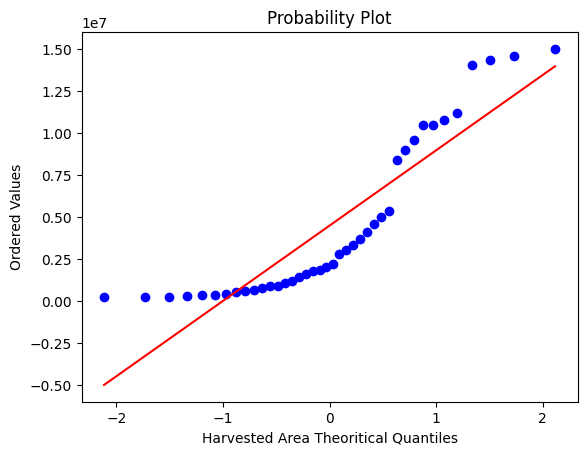


 mu = 178114.48 and sigma = 13671.17



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\2525050222.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


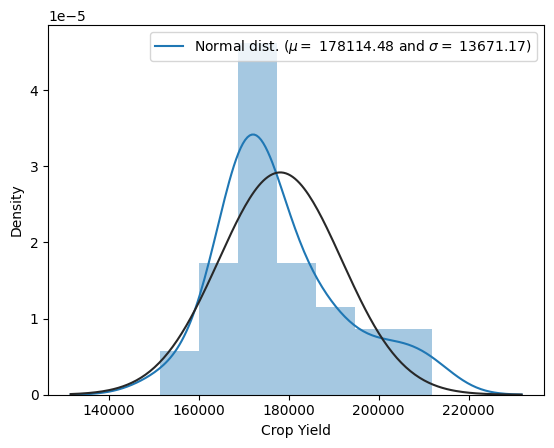

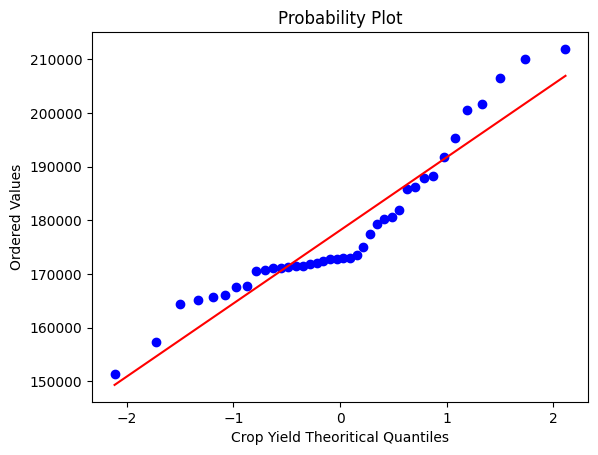

<Figure size 640x480 with 0 Axes>

In [472]:
# Checking distribution of data

from scipy import stats
from scipy.stats import norm, skew

fig, axs = plt.subplots()
index = 0

for k, v in data.items():
  sns.distplot(data[k], fit=norm)

  (mu, sigma) = norm.fit(data[k])
  print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')

  fig = plt.figure()
  res = stats.probplot(data[k], plot=plt)
  plt.xlabel('{} Theoritical Quantiles'.format(k))
  plt.show()

  index += 1

plt.tight_layout()

Removing Feature 
- ALLSKY_SFC_LW_DWN

Normalizing Data
- Crop Yield
- Production Quantity
- Harvested Area

In [473]:
# Removing ALLSKY_SFC_LW_DWN feature

data = data.drop(columns=['ALLSKY_SFC_LW_DWN'])

In [474]:
# normalizing data with Log Transformation

data['Crop Yield'] = np.log1p(data['Crop Yield'])
data['Production Quantity'] = np.log1p(data['Production Quantity'])
data['Harvested Area'] = np.log1p(data['Harvested Area'])


 mu = 26.42 and sigma = 0.24



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


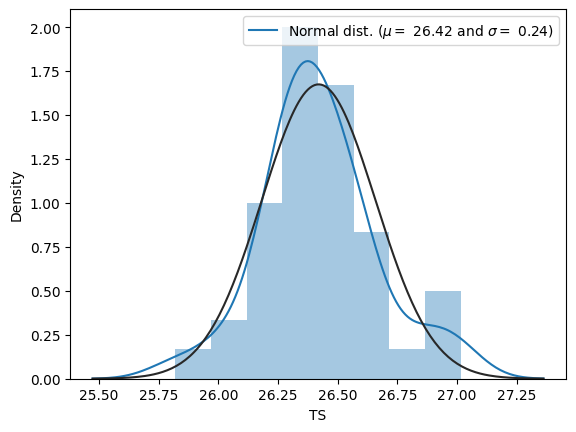

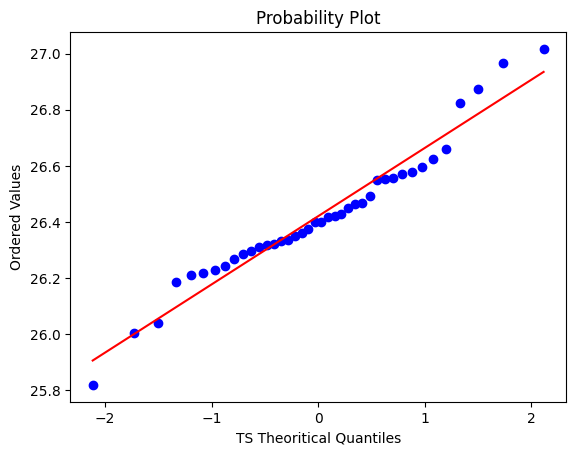


 mu = 26.16 and sigma = 0.26



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


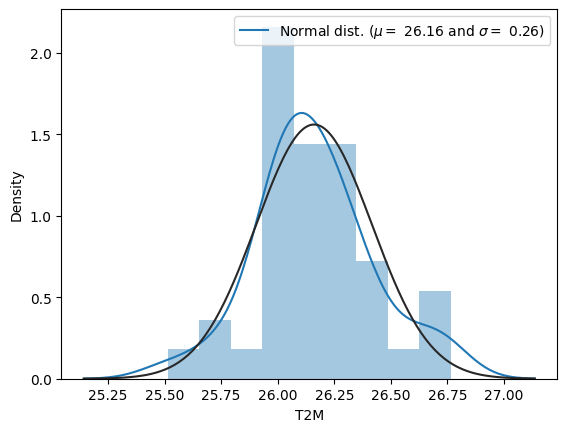

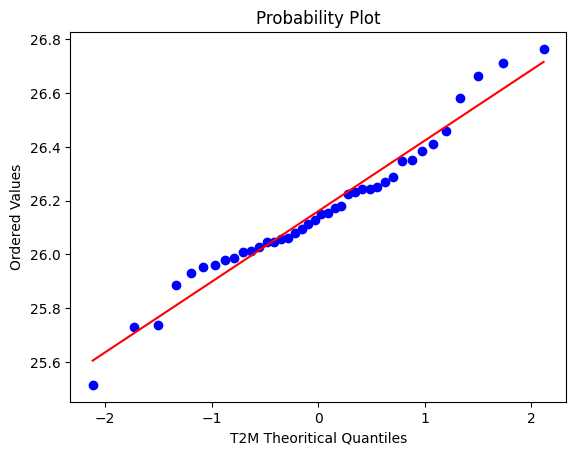


 mu = 18.47 and sigma = 0.31



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


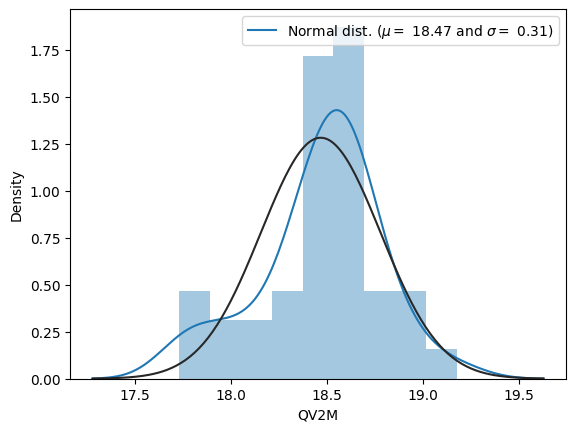

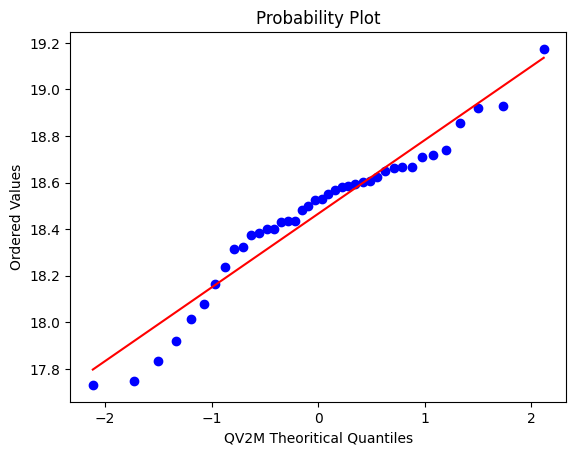


 mu = 86.80 and sigma = 0.76



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


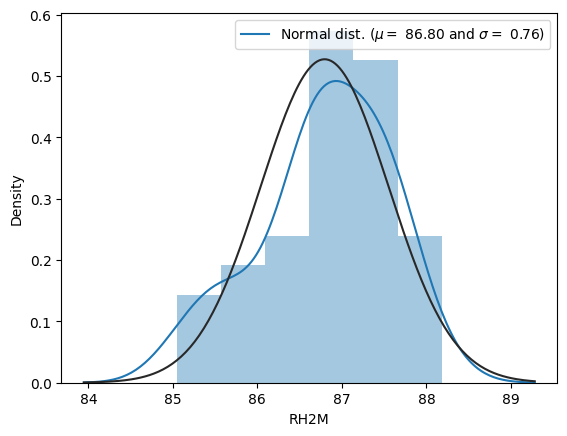

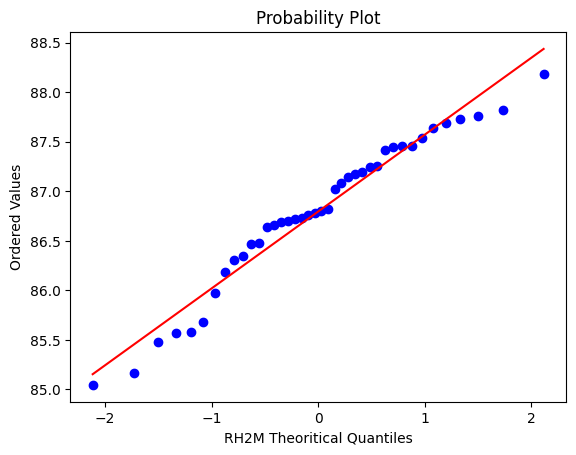


 mu = 23.69 and sigma = 0.28



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


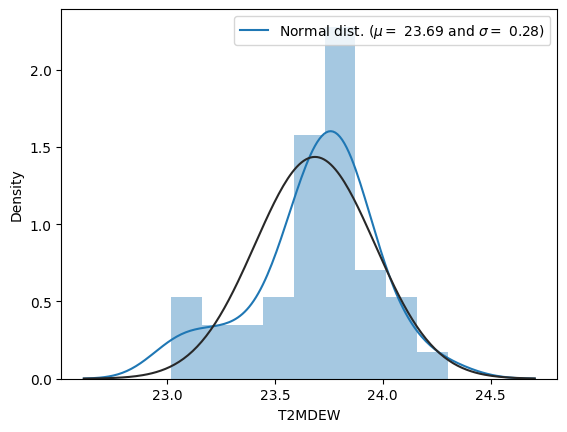

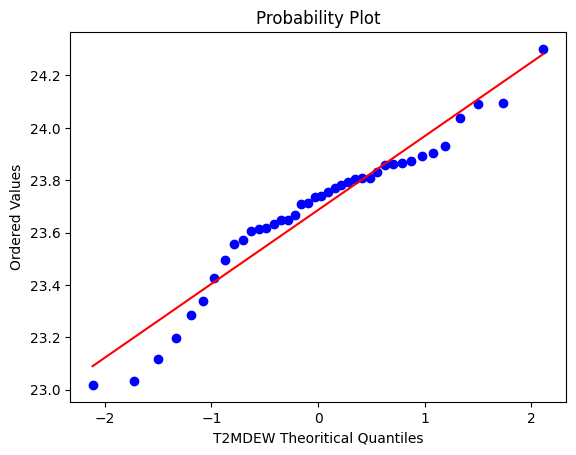


 mu = 24.92 and sigma = 0.25



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


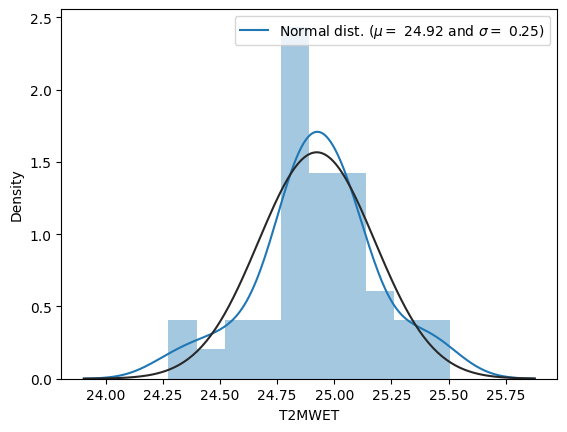

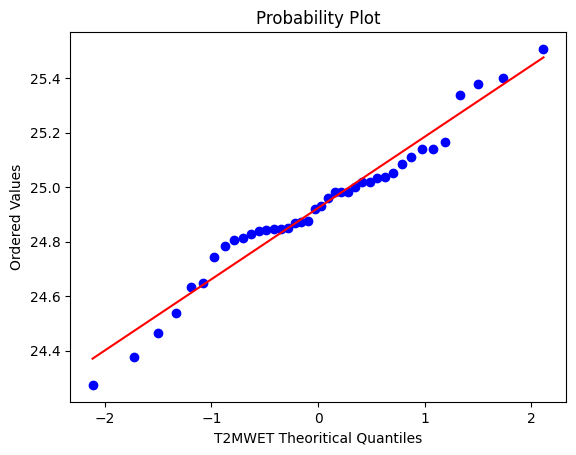


 mu = 0.86 and sigma = 0.04



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


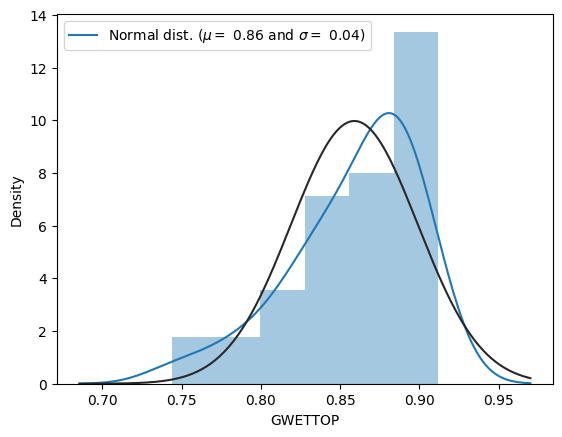

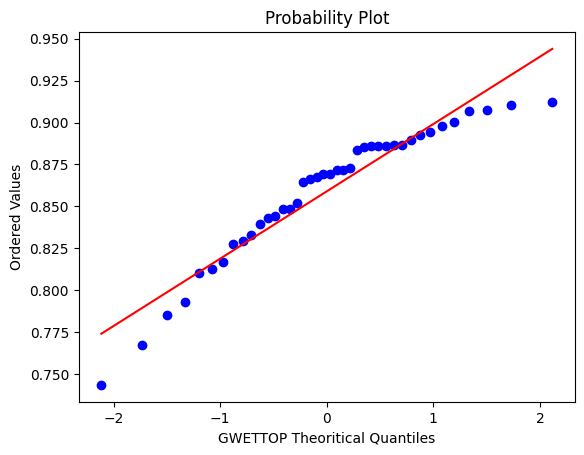


 mu = 31.26 and sigma = 0.38



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


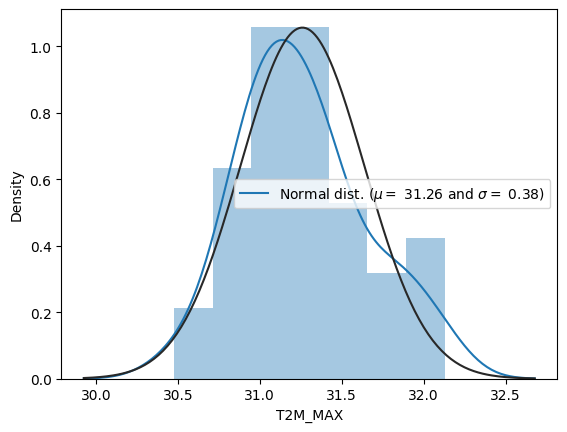

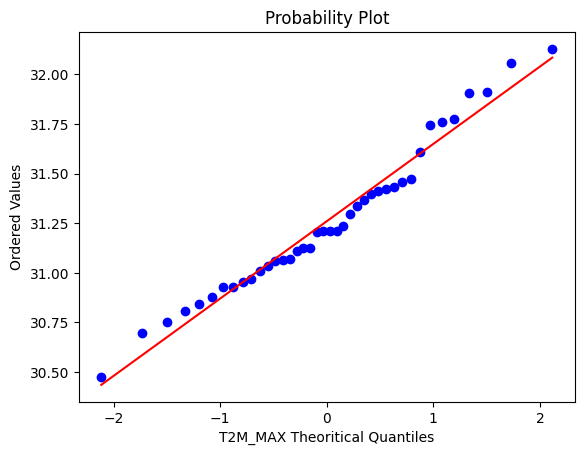


 mu = 21.66 and sigma = 0.37



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


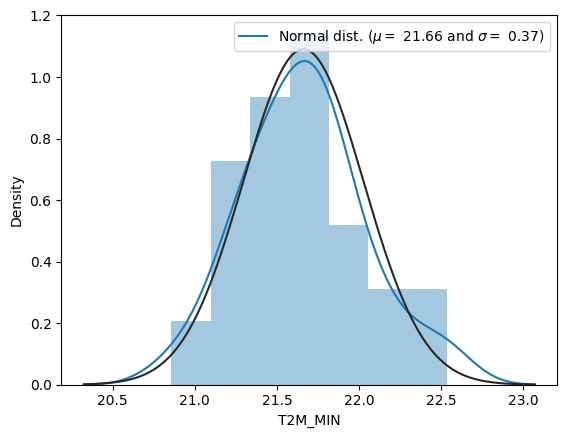

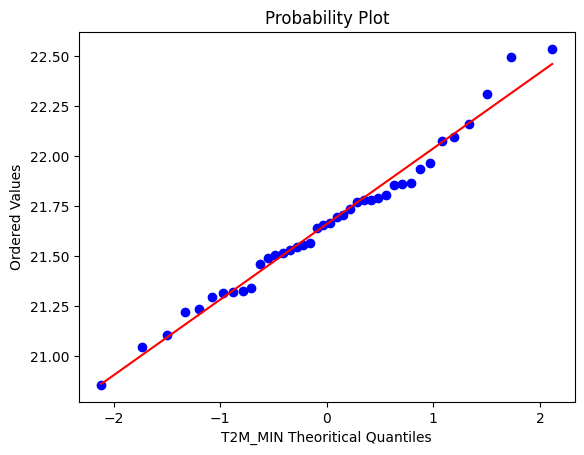


 mu = 0.90 and sigma = 0.04



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


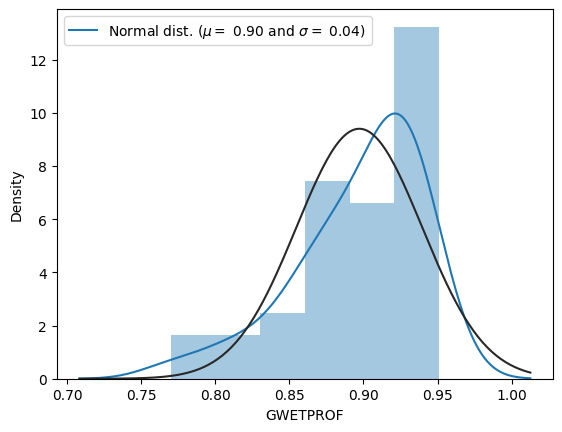

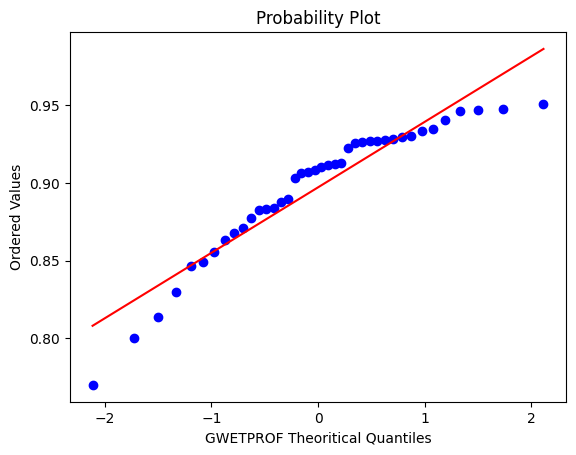


 mu = 0.87 and sigma = 0.05



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


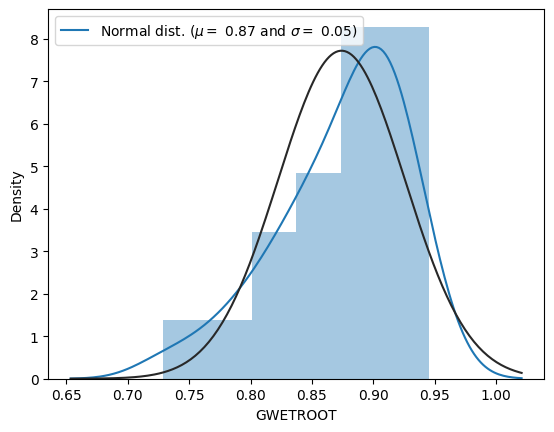

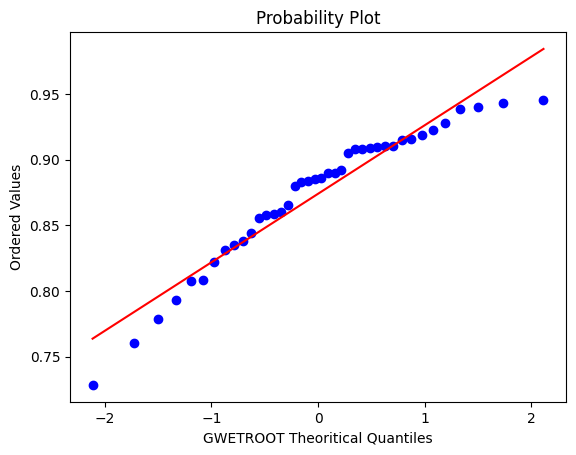


 mu = 9.60 and sigma = 0.41



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


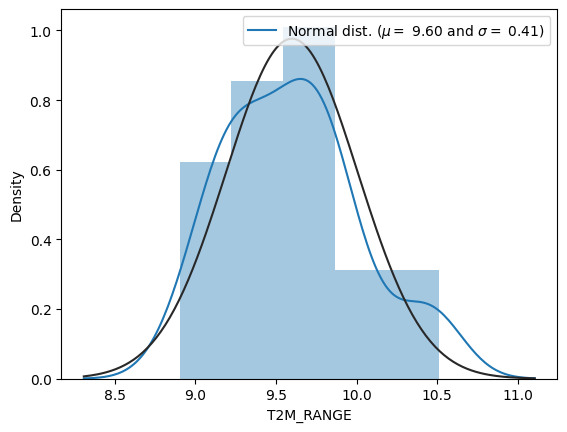

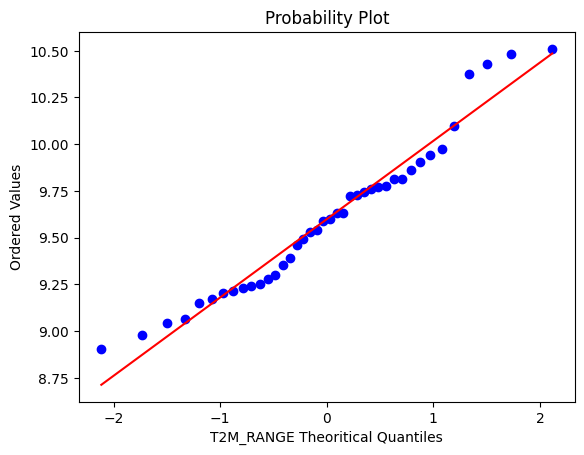


 mu = 6.94 and sigma = 0.96



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


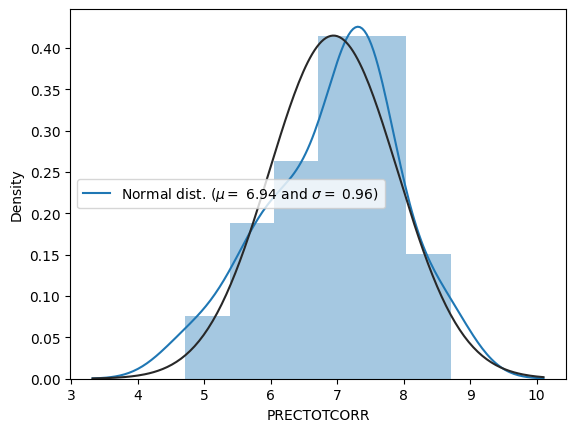

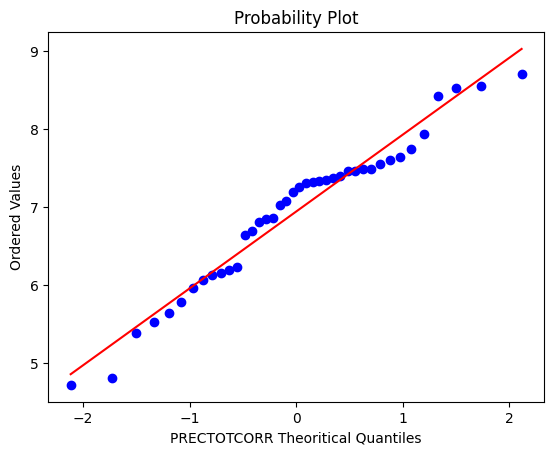


 mu = 2458.53 and sigma = 356.52



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


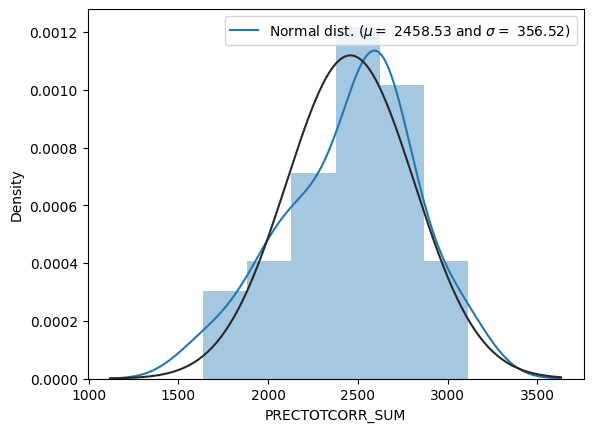

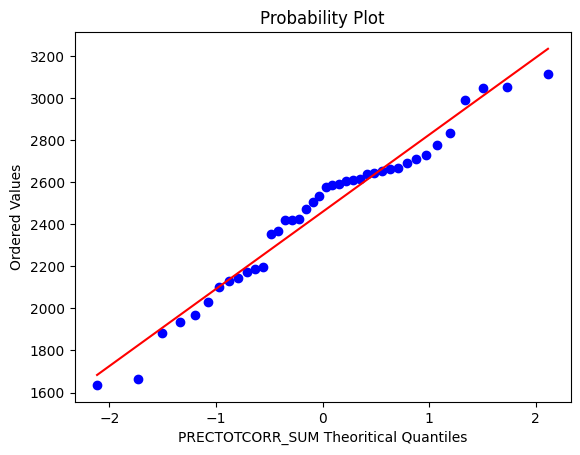


 mu = 17.47 and sigma = 1.30



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


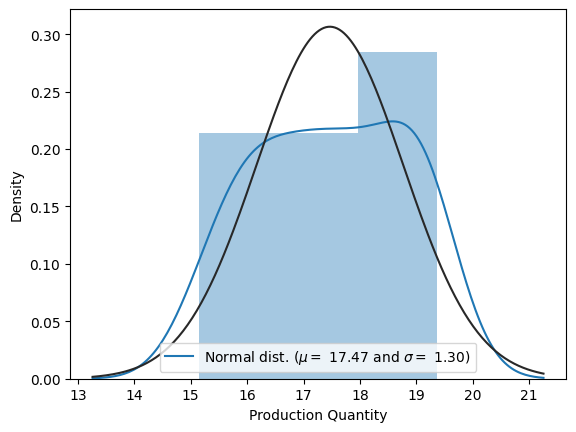

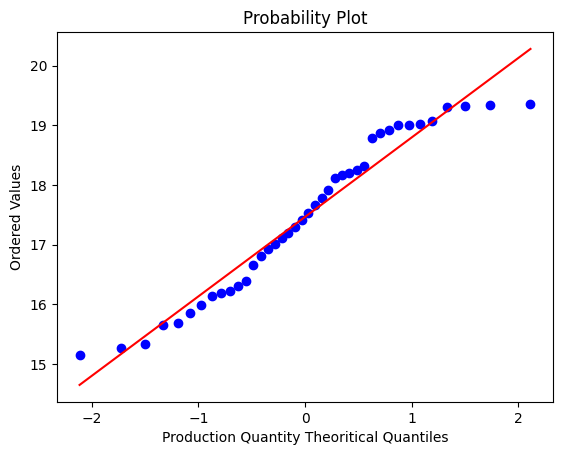


 mu = 14.59 and sigma = 1.32



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


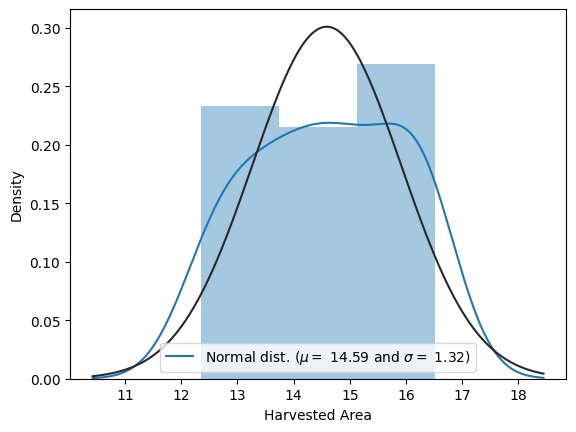

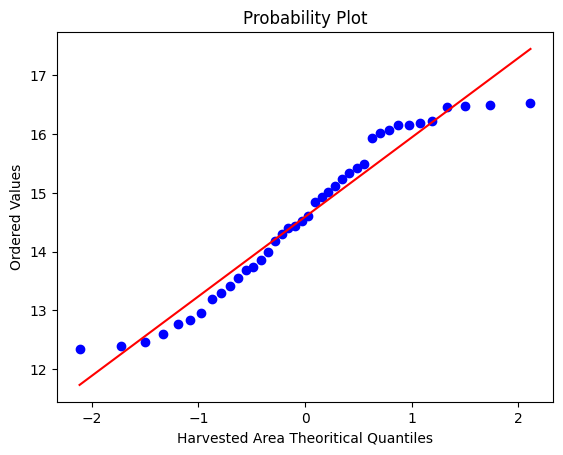


 mu = 12.09 and sigma = 0.07



C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1658481966.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


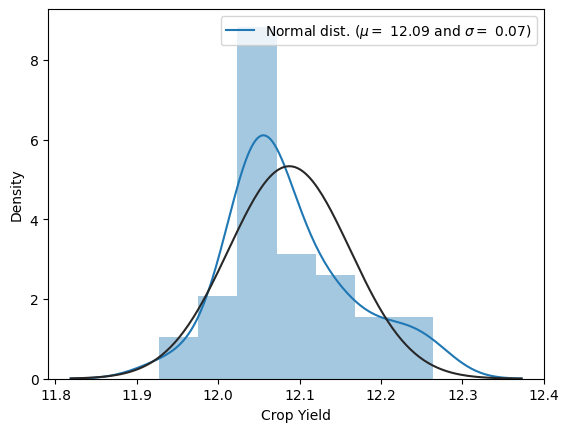

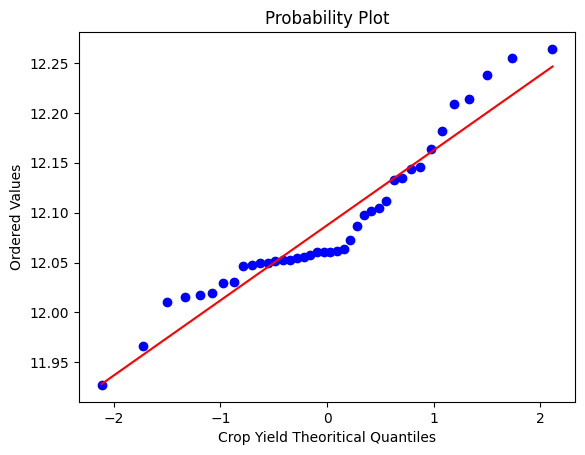

<Figure size 640x480 with 0 Axes>

In [475]:
from scipy import stats
from scipy.stats import norm, skew

fig, axs = plt.subplots()
index = 0

for k, v in data.items():
  sns.distplot(data[k], fit=norm)

  (mu, sigma) = norm.fit(data[k])
  print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')

  fig = plt.figure()
  res = stats.probplot(data[k], plot=plt)
  plt.xlabel('{} Theoritical Quantiles'.format(k))
  plt.show()

  index += 1

plt.tight_layout()

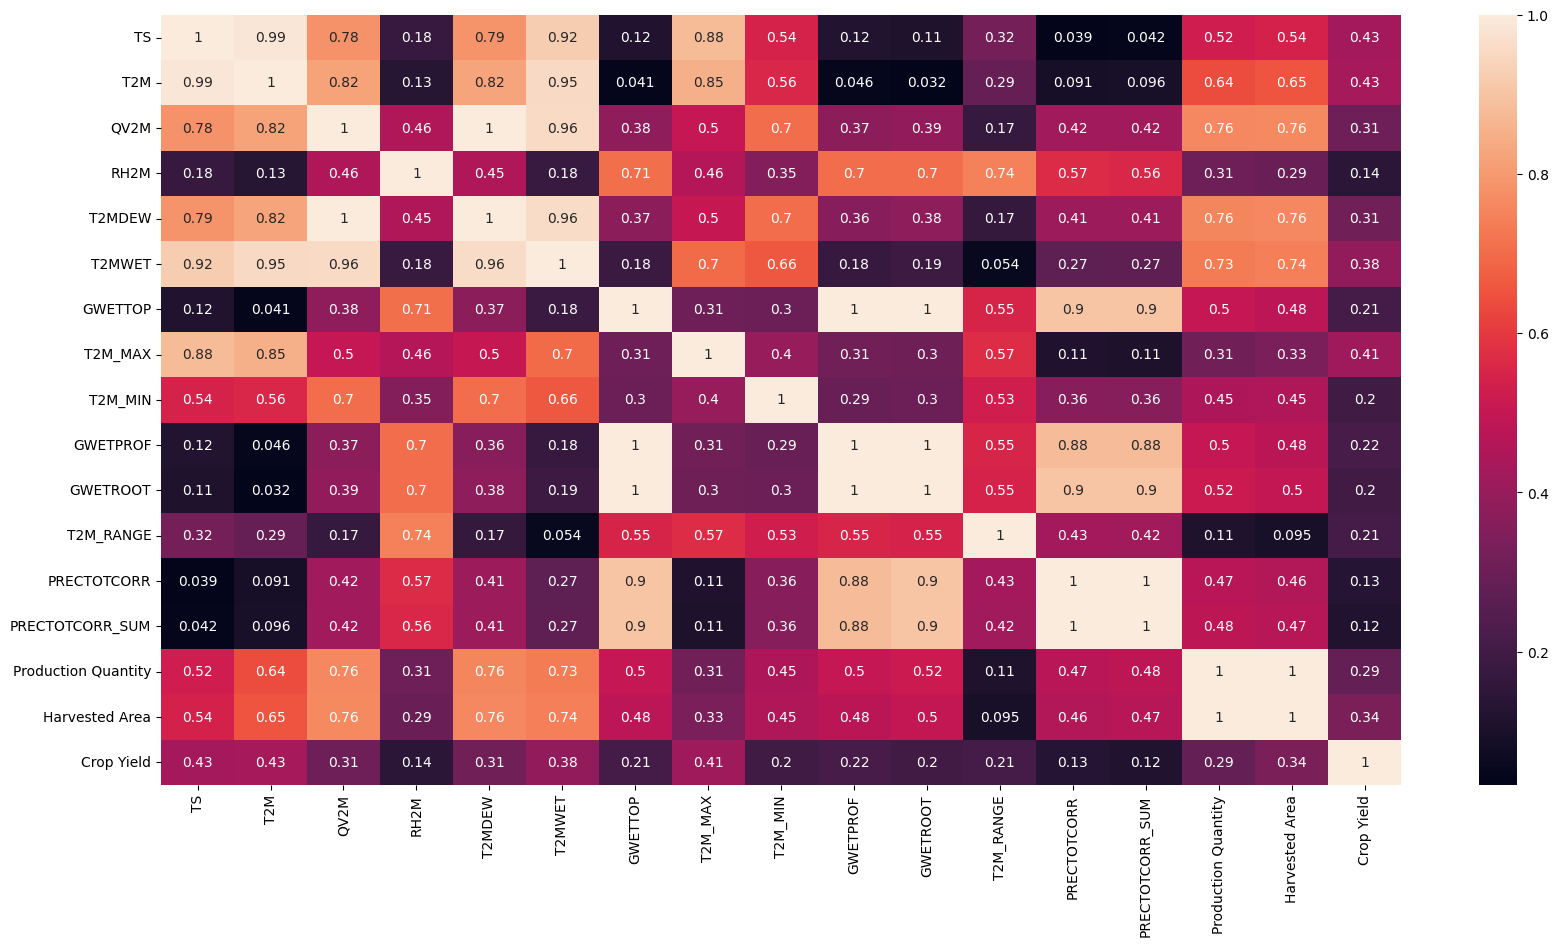

In [476]:
# checking correlation between feature with heatmap

plt.figure(figsize=(20, 10))

cor = data.corr().abs()
sns.heatmap(cor, annot=True)
plt.show()

In [477]:
# only using certain feature with ammount of correlation

cor_target = abs(cor['Crop Yield'])
relevant_features = cor_target[cor_target > 0.2]
feature_names = [index for index, value in relevant_features.iteritems()]

feature_names.remove('Crop Yield')

print(feature_names)
print(len(feature_names))

['TS', 'T2M', 'QV2M', 'T2MDEW', 'T2MWET', 'GWETTOP', 'T2M_MAX', 'GWETPROF', 'GWETROOT', 'T2M_RANGE', 'Production Quantity', 'Harvested Area']
12


C:\Users\malik\AppData\Local\Temp\ipykernel_13052\1477983373.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  feature_names = [index for index, value in relevant_features.iteritems()]


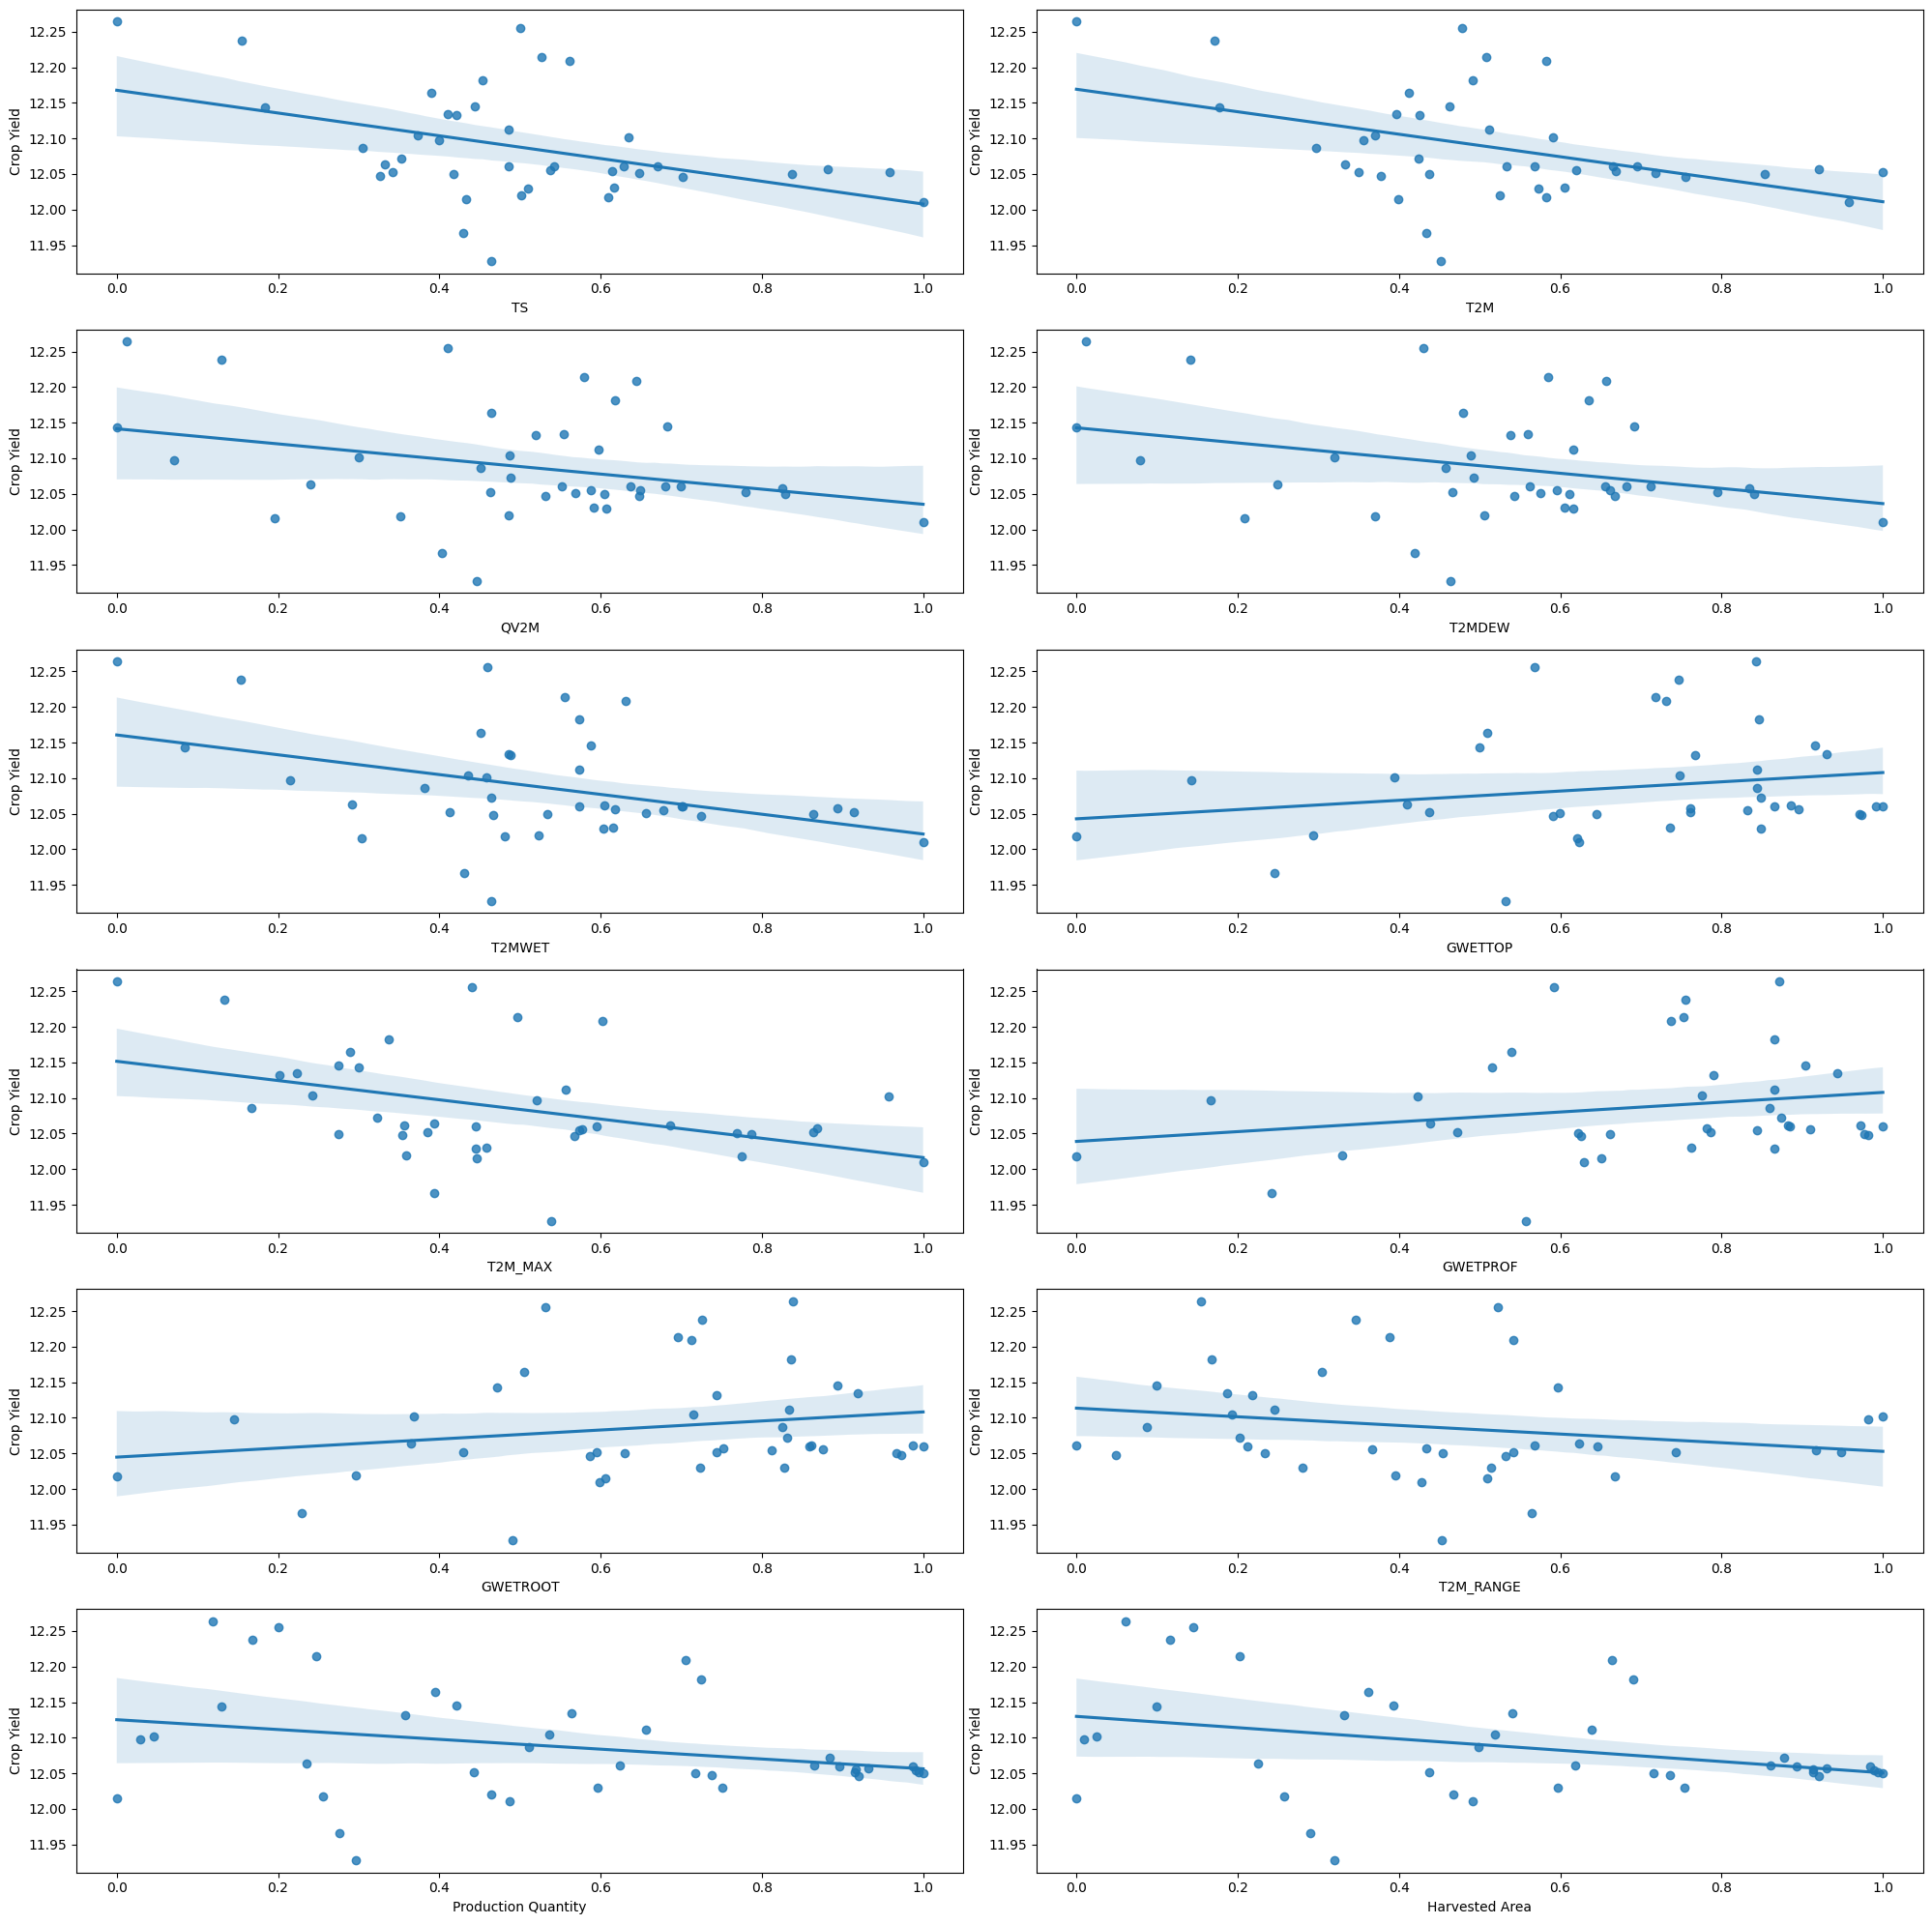

In [479]:
from sklearn import preprocessing

min_max_scaller = preprocessing.MinMaxScaler()
column_cels = feature_names

x = data.loc[:,column_cels]
y = data['Crop Yield']

x = pd.DataFrame(data=min_max_scaller.fit_transform(x), columns=column_cels)
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(20, 20))
index = 0
axs = axs.flatten()

for i, k in enumerate(column_cels):
  sns.regplot(y=y, x=x[k], ax=axs[i])

plt.tight_layout()

In [480]:
# splitting Training and Testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

Decision Tree

In [481]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=0)

decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [482]:
decision_tree_pred = decision_tree.predict(x_test)

In [483]:
from sklearn.metrics import mean_squared_error

metric_eval = {}

mse = mean_squared_error(y_test, decision_tree_pred)
rmse = np.sqrt(mse)
metric_eval['DecisionTree'] = rmse

Ada Boost

In [484]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor()

adaboost.fit(x_train, y_train)

AdaBoostRegressor()

In [485]:
ada_pred = adaboost.predict(x_test)

In [486]:
mse = mean_squared_error(y_test, ada_pred)
rmse = np.sqrt(mse)

metric_eval['AdaBoost'] = rmse

EXTRA TREE

In [487]:
from sklearn.tree import ExtraTreeRegressor

extratree = ExtraTreeRegressor()

extratree.fit(x_train, y_train)

ExtraTreeRegressor()

In [488]:
extra_pred = extratree.predict(x_test)

In [489]:
mse = mean_squared_error(y_test, extra_pred)
rmse = np.sqrt(mse)

metric_eval['ExtraTree'] = rmse

RANDOM FOREST

In [490]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [491]:
random_pred = random_forest.predict(x_test)

In [492]:
mse = mean_squared_error(y_test, random_pred)
rmse = np.sqrt(mse)

metric_eval['RandomForest'] = rmse

GRADIENBOOSTING

In [493]:
from sklearn.ensemble import GradientBoostingRegressor

grad_model = GradientBoostingRegressor()

grad_model.fit(x_train, y_train)

GradientBoostingRegressor()

In [494]:
grad_pred = grad_model.predict(x_test)

In [495]:
mse = mean_squared_error(y_test, grad_pred)
rmse = np.sqrt(mse)

metric_eval['GradientBoosting'] = rmse

ANN

In [500]:
from tensorflow.python.keras.models import sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import regularizers

reg = regularizers.l2(0.01)

model = sequential.Sequential()

model.add(Dense(32, input_shape=(12,), activation='relu', kernel_regularizer=reg))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='relu'))

In [501]:
model.compile(optimizer='SGD', loss=['mean_squared_error'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                416       
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 1,017
Trainable params: 1,017
Non-trainable params: 0
_________________________________________________________________


In [502]:
model_result = model.fit(x_train, y_train, epochs=1000, batch_size=20, validation_data=(x_test, y_test), verbose=1)

Epoch 1/1000
2/2 [==============================] - 1s 181ms/step - loss: 134.4314 - val_loss: 80.2589
Epoch 2/1000
2/2 [==============================] - 0s 25ms/step - loss: 50.2766 - val_loss: 9.1676
Epoch 3/1000
2/2 [==============================] - 0s 26ms/step - loss: 16.6509 - val_loss: 121.9505
Epoch 4/1000
2/2 [==============================] - 0s 29ms/step - loss: 113.2028 - val_loss: 67.7350
Epoch 5/1000
2/2 [==============================] - 0s 26ms/step - loss: 42.6267 - val_loss: 8.7299
Epoch 6/1000
2/2 [==============================] - 0s 25ms/step - loss: 19.2630 - val_loss: 17.2414
Epoch 7/1000
2/2 [==============================] - 0s 26ms/step - loss: 38.1760 - val_loss: 22.3077
Epoch 8/1000
2/2 [==============================] - 0s 26ms/step - loss: 20.2496 - val_loss: 67.6108
Epoch 9/1000
2/2 [==============================] - 0s 27ms/step - loss: 50.5482 - val_loss: 5.0195
Epoch 10/1000
2/2 [==============================] - 0s 28ms/step - loss: 11.3597 - val_lo

In [503]:
from tensorflow.python.keras.losses import MeanSquaredError
from tensorflow.python.keras.metrics import RootMeanSquaredError

mse = MeanSquaredError()
rmse = RootMeanSquaredError()

ann_predict = model.predict(x_test)

predict_mse = mse(y_test, ann_predict).numpy()
predict_rmse = rmse(y_test, ann_predict).numpy()

metric_eval['ANN'] = predict_rmse

METRIC

In [504]:
metric_df = pd.DataFrame(data=metric_eval, index=['RMSE'])
metric_df

DecisionTree  AdaBoost  ExtraTree  RandomForest  GradientBoosting  \
RMSE      0.145098  0.116584   0.141503      0.106776          0.116506   

           ANN  
RMSE  0.129045

Text(0.5, 1.0, 'Evaluasi Model dan Dataset* Lower better')

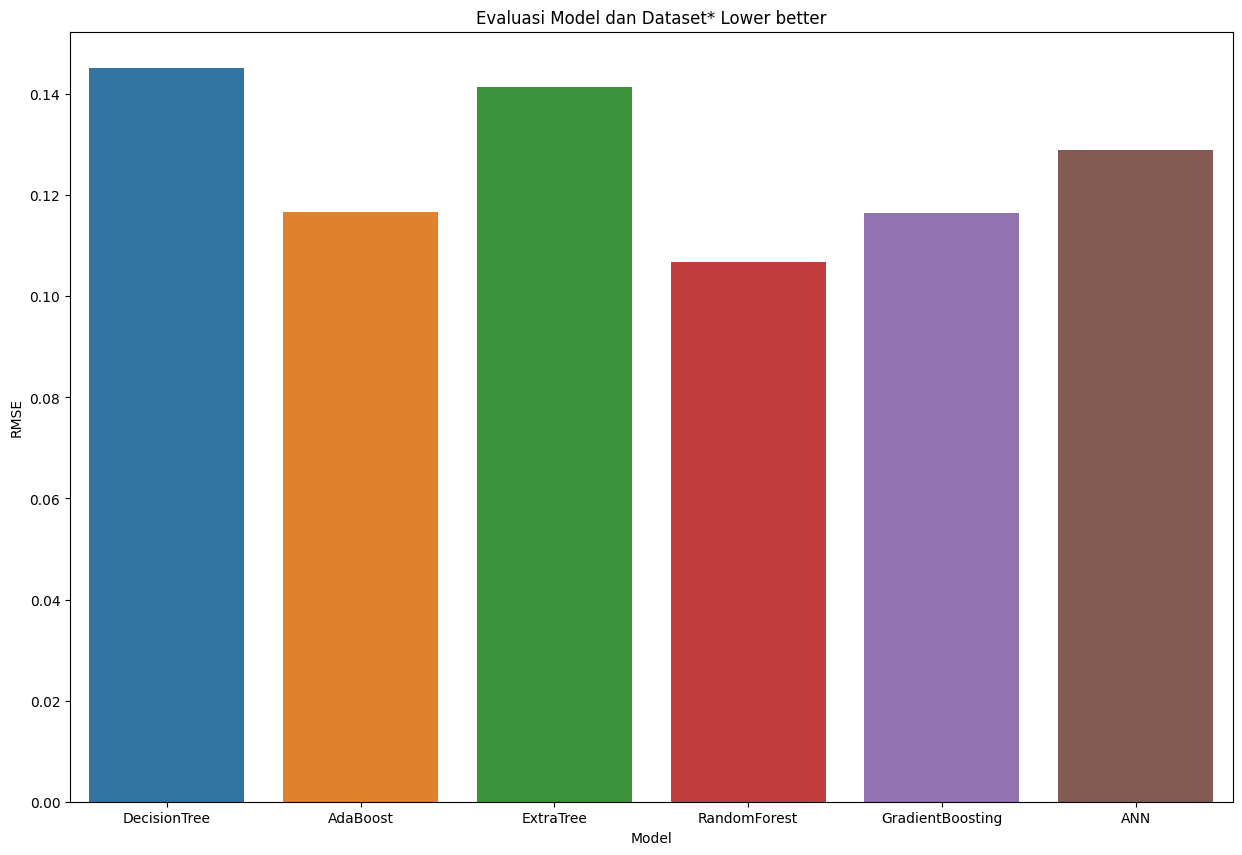

In [505]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(data=metric_df)

plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Evaluasi Model dan Dataset* Lower better')